# Practica 2

Esta practica esta dividida en dos partes. La primera parte se centra en explorar el concepto de **Word Embeddings**: vectorizacion del texto con redes neuronales. Concretamente, vamos a entrenar nuestros propios embeddings con el modelo [FastText](https://fasttext.cc/). La segunda parte esta dedicada a entender la aplicacion de modelos basados en **transformers** usando la libreria [HuggingFace](https://huggingface.co/)🤗. Concretamente, usaremos el modulo [Pipeline](https://huggingface.co/docs/transformers/main_classes/pipelines) para resolver multiples tareas NLP, y realizaremos un ajuste fino del modelo [BERT](https://arxiv.org/pdf/1810.04805) para clasificar texto usando transformers.

❗Para la segunda parte de la practica, es necesario utilizar una de las **GPU/TPUs** disponibles en colab. Puedes comprobar si esta activa con el comando `!nvidia-smi`.

---



<font color='blue' size=2>
    <b>Nota</b>: Las preguntas planteadas se han contestado en <u>celdas Markdown</u> o en <u>celdas de código</u> (via <i>print</i>). Para facilitar la evaluación de este Notebook, en ambos casos se ha utilizado una fuente de color azul.
    </font>

<font color='blue' size=2>
    <b>Nota</b>: Al igual que en la Práctica 2 del módulo anterior, <b>el uso de Google Colab me ha resultado absolutamente frustrante</b>. El entorno se desconecta repetidamente obligando a ejecutar el código desde el principio, con la consiguiente pérdida de tiempo. Además, frecuentemente se me agotaba la RAM durante la descarga de los datos y esta se quedaba a medias.<br><br>
    Finalmente, tuve que suscribirme a "Colab Pro" para tener la opción de "alta capacidad de RAM", mayores tiempos de inactividad y más "unidades informáticas". Curiosamente, la alta capacidad de RAM contratada a Google, es similar a la RAM de mi ordenador.    

    </font>

In [ ]:
from google.colab import drive
from PIL import Image

drive.mount('/content/drive/')
img = Image.open('/content/drive/My Drive/Practica2/Figuras/Colab.png')
display(img)


In [ ]:
img = Image.open('/content/drive/My Drive/Practica2/Figuras/Colab2.png')
display(img)

In [ ]:
img = Image.open('/content/drive/My Drive/Practica2/Figuras/Colab3.png')
display(img)

## Word Embeddings con FastText

En la primera parte de la practica tiene como objetivo profundizar sobre el concepto de **word embeddings**.

 La libreria [FastText](https://fasttext.cc/) , proporciona word embeddings para 157 lenguajes, podeis ver la lista completa [aqui](https://fasttext.cc/docs/en/crawl-vectors.html).
Para comenzar, vamos a descargar el modelo pre-entrenado en español de FastText. Este modelo ha sido entrenado con datos de Common Crawl y Wikipedia. La celda a continuacion descarga y descomprime el modelo. Al finalizar la descarga, vereis un archivo llamado `cc.es.300.bin` en vustro directorio Google Colab. Seguidamente, el resto de celdas importan las librerias necesarias y cargan el modelo FastText en español en la variable `modelo_fasttext`.

 ⏰ Esto tarda ~2 minutos (dependiendo de vuestra conexion). Para no descargarlo siempre que inicies la practica, puedes descargar el archivo `cc.es.300.bin`, subirlo a tu google drive, y acceder al modelo directamente.  

In [ ]:
!pip install fasttext datasets
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.es.300.bin.gz
!gunzip cc.es.300.bin.gz

In [ ]:
# importamos las librerias necesarias
import fasttext
import re
from datasets import load_dataset
import zipfile
from google.colab import files

In [ ]:
# Cargar el modelo
modelo_fasttext = fasttext.load_model('cc.es.300.bin')

In [ ]:
# Guardamos el modelo fasttext en "My Drive"
modelo_fasttext.save_model('/content/drive/My Drive/Practica2/fasttext_model.bin')

### Ejercicio 1

---



Implementa el codigo que muestre la siguiente informacion sobre el modelo pre-entrenado almacenado en la variable `modelo_fasttext`, e imprime el resultado por pantalla con la funcion `print()`:
- Tamaño de los embeddings
- Tamaño del vocabulario

💡 En la seccion `model object` de la [documentacion](https://fasttext.cc/docs/en/python-module.html), puedes ver las funciones disponibles. Tambien se pueden ver utilizando el metodo integrado en python `dir()`.

In [ ]:
# Cargamos el modelo fasttext desde Google Drive
modelo_fasttext = fasttext.load_model('/content/drive/My Drive/Practica2/fasttext_model.bin')

In [ ]:
! pip install colorama
from colorama import Fore, Back, Style
def bold(text):
    bold_start = '\033[1m'
    bold_end = '\033[0m'
    return bold_start + text + bold_end

def italic(text):
    italic_start = '\033[3m'
    italic_end = '\033[0m'
    return italic_start + text + italic_end

In [ ]:
# Tu codigo aqui


print(Fore.LIGHTBLUE_EX + 'El tamaño del volcabulario se corresponde con la \
longitud del array' +italic(' modelo_fasttext.words') +'\n')
print(Fore.BLUE + bold(f'   El modelo contiene {len(modelo_fasttext.words)} palabras\n'))

print(Fore.LIGHTBLUE_EX + 'Podemos encontrar cada palabra especificando su índice, \
como se muestra en el ejemplo siguiente:\n')
palabra_100 = modelo_fasttext.words[100]
print(Fore.BLUE + bold(f'   La palabra numero 100 es: {palabra_100}\n'))

print(Fore.LIGHTBLUE_EX + 'Finalmente, obtenemos el tamaño de los embeddings usando la \
función' + italic(' "get.dimension"') + '\n')
embedding_size = modelo_fasttext.get_dimension()
print(Fore.BLUE + bold(f'   El tamaño de los embeddings es: {embedding_size}'))



El tamaño del volcabulario se corresponde con la longitud del array modelo_fasttext.words

   El modelo contiene 2000000 palabras

Podemos encontrar cada palabra especificando su índice, como se muestra en el ejemplo siguiente:

   La palabra numero 100 es: cada

Finalmente, obtenemos el tamaño de los embeddings usando la función "get.dimension"

   El tamaño de los embeddings es: 300


Utiliza la funcion `get_nearest_neighbors` del modelo `modelo_fasttext` para extraer la palabra mas similar a la palabra *'bueno'*. Saca el resultado por pantalla.



In [ ]:
# Tu codigo aqui

word = 'bueno'

palabras_similares = modelo_fasttext.get_nearest_neighbors(word)
palabra_mas_similar = palabras_similares[0][1]
indice_mas_similar = round(palabras_similares[0][0], 4)

print(Fore.LIGHTBLUE_EX + '\nObtenemos La palabra más similar como la primera (índice 0) del conjunto devuelto por la función ' + italic('get_nearest_neighbors')+'\n')
print(Fore.BLUE + bold(f'   La palabra más similar a "bueno" es: {palabra_mas_similar} \n'))
print(Fore.BLUE + bold(f'   Y su "índice de similitud" es: {indice_mas_similar} \n'))


Obtenemos La palabra más similar como la primera (índice 0) del conjunto devuelto por la función get_nearest_neighbors

   La palabra más similar a "bueno" es: malo 

   Y su "índice de similitud" es: 0.8018 



Responde a la siguiente pregunta:
- ¿Por que se da el caso de que palabras antonimas tienen embeddings similares/cercanos?

<font color='blue' size= 2>
<b>Respuesta</b>:<br>
Los modelos de la libreria <i>Fasttext</i> han sido entrenados usando arquitecturas <i>Word2Vec</i> (concretamente la arquitectura Continuous Bag of Words o CBOW$^{[1]}$) Esta arquitectura predice la palabra actual basándose en el contexto. Por lo tanto, funciona bien con los sinónimos y en la detección de analogías pero no es capaz de discriminar los términos antónimos ya que <b>estos suelen aparecer en contextos similares</b>.$^{[3][4][5]}$ Mientras que en ciertos problemas (p.ej. clasificación de palabras) los antónimos se pueden considerar "de la misma clase" (p.ej. adjetivos), en otros (p.ej. análisis de sentimientos o gestión de reclamaciones), <b>la capacidad de diferenciación es crucial para el correcto rendimiento de los modelos</b>. $^{[3][4]}$<br><br>
Por este motivo se han realizado ciertos esfuerzos en desarrollar modelos sensibles a los antónimos. Por ejemplo, Schwartz et <i>al.</i>,$^{[2]}$, desarrolaron un modelo basado en patrones simétricos de pares como "either X or Y" (p.e.j. <i>either high or low</i>) o "from X to Y" (<i>from top tp bottom</i>). Más recientemente, Dou et <i>al.</i>$^{4}$ han propuesto un modelo en el que se modifica la función objetivo del modelo <i>skipgram</i> y que se apoya en los datasets <i>Thesauri</i> y <i>SentiWordNet</i>, etiquetados específicamente para tareas de análisis de sentimientos y clasificación de opinión.<br><br><br>   


<font color='blue' size= 1.5>
[1] https://fasttext.cc/docs/en/crawl-vectors.html<br>
[2] Roy Schwartz, Roi Reichart, and Ari Rappoport. 2015. <i>Symmetric Pattern Based Word Embeddings for Improved Word Similarity Prediction</i>. In Proceedings of the Nineteenth Conference on Computational Natural Language Learning, pages 258–267, Beijing, China. Association for Computational Linguistics.<br>
[3] A. Mandelbaum and A. Shalev, <i>Word Embeddings and Their Use In Sentence Classification Tasks</i>, Published in arXiv.org 26 October 2016; https://arxiv.org/pdf/1610.08229<br>
[4] Dou, Z., Wei, W., Wan, X. (2018). <i>Improving Word Embeddings for Antonym Detection Using Thesauri and SentiWordNet</i>. In: Zhang, M., Ng, V., Zhao, D., Li, S., Zan, H. (eds) Natural Language Processing and Chinese Computing. NLPCC 2018. Lecture Notes in Computer Science(), vol 11109. Springer, Cham. https://doi.org/10.1007/978-3-319-99501-4_6<br>


><font color='blue' size= 2 ><b>Nota</b>: Una copia de Los artículos citados se han incluido en la entrega de la práctica.
</font>


<font color='blue' size= 2>
En previsión a la pregunta (Ejercicio 2) sobre las diferencias entre <i>fasttext_model</i> y <i>model_legal</i> estudiamos aquí las palabras más cercanas a <i>"pena"</i>. Como se puede observar en la celda siguiente, estas son: <i>pena.Es, pena.Y, pena.La, etc.</i>, <b>que no son palabras en sentido estricto</b>. <br><br>
Entiendo que esto refleja errores tipográficos en el corpus, en los que no se han separado correctamente las palabras de los signos de puntuación. Desafortunadamente, tenemos acceso al modelo entrenado pero no al corpus de entrenamiento. Sin embargo, podemos circunvalar esta limitación , creando un bucle para eleminar aquellas palabras cercanas que contengan signos de puntuación.  



In [ ]:
palabras_similares2 = modelo_fasttext.get_nearest_neighbors('pena', 10)
print(Fore.BLUE + '   Las 10 palabras más similares a "pena" son:\n')
for i in range(10):
  print(Fore.LIGHTBLUE_EX + palabras_similares2[i][1])

   Las 10 palabras más similares a "pena" son:

pena.Es
pena.Y
pena.La
pena.Pero
pena.En
lapena
pena.
pena.No
pena.A
pena.Que


In [ ]:
# Procedemos al filtrado de las palbras cercanas a "pena" que contienen signos de puntuación

palabras_similares3 = modelo_fasttext.get_nearest_neighbors('pena', 10000)
palabras_similares4 = []
for i in range(1000):
  if '.' not in palabras_similares3[i][1] and ',' not in palabras_similares3[i][1]:
    palabras_similares4.append(palabras_similares3[i][1])

# Ahora imprimimos en pantalla las 10 primeras palabras más cercanas a "pena" sin signos de puntuación
print(Fore.BLUE + '   Las 20 palabras más similares a "pena" (sin puntos de puntuación) son:\n')
for i in range(20):
  print(Fore.LIGHTBLUE_EX + palabras_similares4[i])

   Las 20 palabras más similares a "pena" (sin puntos de puntuación) son:

lapena
lástima
valela
penaa
Pena
penita
vale
penaaa
penaaaa
penaY
penaLa
merece
Merece
Valdría
PENA
Valdrá
mereciera
pena-
penaaaaa
merecio


<font color='blue' size=2>
A pesar de no haber filtrado todos los errores tipográficos$^{1}$ ya se puede ver que las palabras más cercanas son aquellas que están <b>semánticamente relacionadas</b> (p.ej. <i>lástima</i>), o que suelen <b>aparecer juntas</b> (p.ej. <i>Merece, mereció, valdría</i>) <b>en el lenguaje coloquial</b>. Veremos más adelante que, cuando un modelo se entrena con un <b>corpus específico</b> del lenguaje jurídico, <b>los resultados obtenidos son apreciablemente distintos</b>.<br><br>

<font color='blue' size=1.5>
$^{1}$ Quizás las "palabras" <i>penaa, penaaa, y penaaa</i> han sido extraidas de cancioneros, en los que la extensión de la última vocal indica sostenimiento del sonido al cantar.  

### Ejercicio 2

---



A continuacion, vamos a entrenar un modelo FastText para generar nuestros propios embeddings.

Vamos a usar un dataset llamado [spanish-legal-data](https://huggingface.co/datasets/Ramitha/spanish-legal-data). Es un dataset con texto enfocado al ambito legislativo. Como el dataset es gigantesco, usamos el parametro streaming de HuggingFace 🤗 Datasets para acceder a los datos en tiempo real segun sea necesario. Asi, trabajamos con un dataset limitado de 50,000 instancias.

In [ ]:
# Acceder al dataset con texto legislativo

dataset = load_dataset("Ramitha/spanish-legal-data", split='train', streaming=True)
limited_dataset = dataset.take(50000)

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

Ejecutando la celda de abajo, vemos un ejemplo del texto almacenado en esta base de datos.

In [ ]:
example = next(iter(limited_dataset))['Data']
example

'ADMINISTRACIÓN CORPORATIVA\n\n 1. CONSORCIO DE ZONA FRANCA. AMPLIACIÓN LEGAL DE COMPETENCIAS: CONSECUENCIAS\n\n Consecuencias de la ampliación legal de competencias de los Consorcios de Zona Franca.'

Para entrenar nuestro modelo, vamos a generar un archivo `train.txt` que contenga todas las instancias de nuestra base de datos `limited_dataset` de texto juridico. Primero, vamos a preprocesar este texto para garantizar un entrenamiento adecuado.

Completa la funcion `preprocess_text` para que dado un texto realize el siguiente preprocesamiento:
- normalizar el texto
- eliminar los numeros
- eliminar signos de puntuacion
- eliminar los cambios de linea '\n'


In [ ]:
def preprocess_text(text):
  # Tu codigo aqui
  texto_normalizado = text.lower() # Normalización
  texto_sin_numeros = re.sub(r'\d+', '', texto_normalizado) # Números
  texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_sin_numeros) # Puntuación
  texto_sin_saltos = texto_sin_puntuacion.replace('\n', ' ') # Saltos de línea
  texto_procesado = texto_sin_saltos
  return texto_procesado


Utiliza la celda de abajo para comprobar el funcionamiento de la funcion `preprocess_text`.

In [ ]:
# Tu codigo aqui
print(Fore.BLUE + bold('   El texto sin procesar es:\n'))
print(Fore.LIGHTBLUE_EX + example +'\n')
clean_text = preprocess_text(example)
print(Fore.BLUE + bold(f'   El texto procesado es :\n'))
print(Fore.LIGHTBLUE_EX + clean_text)

   El texto sin procesar es:

ADMINISTRACIÓN CORPORATIVA

 1. CONSORCIO DE ZONA FRANCA. AMPLIACIÓN LEGAL DE COMPETENCIAS: CONSECUENCIAS

 Consecuencias de la ampliación legal de competencias de los Consorcios de Zona Franca.

   El texto procesado es :

administración corporativa    consorcio de zona franca ampliación legal de competencias consecuencias   consecuencias de la ampliación legal de competencias de los consorcios de zona franca


Ahora estamos listos para generar nuestro archivo de entrenamiento `train.txt`. El siguiente codigo de abajo crea el archivo `train.txt` utilizando la funcion anterior para preprocesar cada documento de la coleccion.


In [ ]:
# Guardar un archivo train.txt para entrenar el modelo

with open('train.txt', 'w', encoding='utf-8') as file:
    for texto in limited_dataset:
        processed_text = preprocess_text(texto['Data'])
        file.write(processed_text)

La libreria FastText tiene una manera eficiente y rapida de entrenar tus propios embeddings. Esto se hace con la funcion `train_unsupervised`. Utiliza esta funcion para entrenar un modelo usando nuestro dataset 'train.txt' y las siguientes caracteristicas:
- La red ve los datos 5 veces (numero de epochs)
- La red tiene una learning rate de 0.03
- La dimension de los embeddings tiene que ser de 100

💡La informacion de la funcion `train_unsupervised` esta [aqui](https://fasttext.cc/docs/en/python-module.html#train_unsupervised-parameters).

⏰ La red tarda en entrenarse ~3 minutos (variando en funcion de vuestra conexion)


In [ ]:
# Tu codigo aqui
# Como no se especifica el modelo, tomaremos el que viene por defecto en el campo
# "model" i.e. "skipgram"
modelo_legal = fasttext.train_unsupervised(input='train.txt',epoch=5, lr=0.03, dim=100)

❗Para no entrenar el modelo cada vez que inicies la practica, puedes guardar el modelo entrenado con la funcion `save_model` subirlo a tu google drive, y acceder al modelo con la funcion `load_model`.

In [ ]:
modelo_legal.save_model("/content/drive/My Drive/Practica2/modelo_legal_300.bin")

In [ ]:
modelo_legal = fasttext.load_model("/content/drive/My Drive/Practica2/modelo_legal_300.bin")

A continuacion, vamos a estudiar las diferencias entre ambos modelos: el modelo pre-entrenado `modelo_fasttext` y el nuestro modelo legal `modelo_legal`. Una forma de hacerlo, es intentar intepretar el espacio vectorial que forman los word embeddings. Vamos a comenzar comparando palabras similares, es decir, palabras que se encuentran cerca en el espacio vectorial.  

Implementa el codigo necesario para imprimir por pantalla las **10 palabras** mas cercanas a la palabra **'pena'** para el modelo `modelo_fasttext` (modelo FastText **descargado**).


In [ ]:
target_word = 'pena'

palabras_similares = modelo_legal.get_nearest_neighbors(target_word, 20)
print(Fore.BLUE + bold(f'   Las 20 palabras más similares a {target_word} y sus coeficientes (entre paréntesis) son:\n'))
for i in range (20):
  palabra_mas_similar = palabras_similares[i][1]
  print(Fore.LIGHTBLUE_EX + palabra_mas_similar + ' ' +  '(' + str(round(palabras_similares[i][0], 4)) + ')' + '\n')



   Las 20 palabras más similares a pena y sus coeficientes (entre paréntesis) son:

penas (0.7683)

penal (0.6767)

sanción (0.6663)

prisión (0.6649)

condena (0.6552)

penado (0.6525)

penalen (0.6284)

condenas (0.6122)

penalidad (0.6107)

multa (0.6099)

condenada (0.6091)

condenatoria (0.6057)

prisma (0.6014)

inhabilidad (0.5926)

condenado (0.5857)

delito (0.5839)

cp (0.5816)

sancionó (0.5801)

condenatorio (0.5749)

castiga (0.5675)



Observa los resultados encontrados, y responde a las siguientes preguntas.
1. ¿Por que el modelo pre-entrenado `modelo_fasttext` y el modelo entrenado `modelo_legal` dan resultados de similaridad diferentes?
2. ¿Para que tareas de NLP puede ser ventajoso poseer un modelo de embeddings de dominio especifico?

<font color='blue' size= 2>
<b>Respuestas</b>:<br>

<ul>
<font color='blue' size= 2>
<li><u>Pregunta 1</u>. El <i>modelo_fasttext</i> ha sido entrenado con un corpus generalista, basado en <i>Common Crawl</i> y <i>Wikipedia</i>$\;^{[1]}$ mientras <i>modelo_legal</i> lo ha hecho con un corpus específico del lenguage jurídico/legal. Por lo tanto, mientras en el primero las palabras cercanas a <i>pena</i> son </i>làstima, penita</i>, etc. (como se demonstró anteriormente en este Notebook) en el último, son palabras contextualmente similares desde el punto de vista jurídico (i.e. <i>sanción, prisión, condena</i> y <i>multa</i>.<br><br>
Por otra parte (y posiblemente menos importante), el <i>modelo_fasttext</i> ha sido entrenado usando la arquitectura CBOW mientras que <i>modelo_legal</i> lo ha hecho con <i>skipgram</i>. Aunque ambos modelos están diseñados para el mismo propósito, difieren en su enfoque y estructura interna:<br>
<ul>
<font color='blue' size= 2 >
<li><b>Continuous Bag of Words (CBOW)</b>. Como se comentó en la clase de la Semana 3, en el modelo <i>CBOW</i>, el objetivo es predecir una palabra objetivo a partir de un contexto que consta de palabras circundantes.<br>
Por ejemplo, dadas las palabras "el", "se", "sienta", "en" y "la" como contexto, el objetivo sería predecir la palabra "esterilla".
El modelo CBOW es más rápido de entrenar en comparación con <i>skipgram</i>, especialmente para <b>conjuntos de datos grandes</b>, ya que utiliza el promedio de vectores de contexto.<br> Ademas, funcionar bien en textos donde las palabras tienen <b>significados similares en contextos similares</b>.<br></li><br>

<li><b>Skipgram</b>. Por el contrario, en el modelo <i>skipgram</i>, el objetivo es predecir las palabras circundantes (contexto) a partir de una palabra de entrada.<br>
Por ejemplo, dada la palabra "gato" como entrada, el objetivo sería predecir las palabras "la", "esterilla", "se" "sienta" y "en" como palabras circundantes.<br><br>
</ul>
Aunque más lento de entrenar en comparación con <i>CBOW</i>, <i>skipgram</i> a menudo <b>produce representaciones vectoriales de palabras de mayor calidad</b>, especialmente para <b>palabras raras o con significados múltiples</b>, ya que cada palabra de entrada se convierte en un ejemplo de entrenamiento. Al contrario que <i>CBOW</i>, es más adecuado para <b>conjuntos de datos pequeños o textos con vocabulario diverso</b>. Otra diferencia notable es la <b>superior "capacidad contextual" de <i>skip-gram</i> sobre <i>CBOW</i></b>. De hecho, Mikolov et <i>al.</i>$\;^{[1]}$ han demonstrado esta superioridad (ver tablas 5 y 6 en [1]).</li>
<br>
<li><u>Pregunta 2</u>. Las ventajas de los modelos de embeddings entrenados en dominios específicos es que <b>capturan las características lingüísticas y semánticas específicas del dominio</b>. Por lo tanto, suelen <b>mejorar mejorar la precisión, el rendimiento y la relevancia de los modelos en aplicaciones específicas</b>. Algunas de las tareas en las que el entrenamiento sobre un dominio específico es altamente recomendable son:<br> </li>
<ul>
<font color='blue' size= 2>
<li><b>Extracción de información</b></li>
<li><b>Clasificación de documentos</b></li>
<li><b>Generación de texto</li></b>
<li><b>Traducción automática</li></b>
</ul>
</ul>
<br><br>
<font color='blue' size= 1.5>
$^{[1]}$ Mikolov, Tomas & Chen, Kai & Corrado, G.s & Dean, Jeffrey. (2013). Efficient Estimation of Word Representations in Vector Space. Proceedings of Workshop at ICLR. 2013.


### Pregunta 3

Para continuar nuestra exploracion del espacio vectorial, vamos a utilizar la herramienta [Embedding Projector](https://projector.tensorflow.org/) de [TensorFlow](https://www.tensorflow.org/tensorboard/tensorboard_projector_plugin). Esta herramienta se utiliza para representar graficamente **espacios vectoriales** de alta dimension. Lo que hace es aplicar una **reduccion de dimensionalidad** del espacio vectorial original (100, en nuestro caso) a 3 dimensiones. De esta manera, cada palabra, antes representada con un vector de 100 numeros, queda representada con tan solo 3 numeros. Cada palabra se muestra como un punto en el espacio 3D de la visualizacion grafica.

La vamos a utilizar para analizar los word embeddings generados por el modelo legal entrenado. Para ello, guardaremos los embeddings junto con sus respectivas palabras en el formato adecuado para importarlo a la herramienta Embedding Projector.

La figura de abajo muestra una captura de pantalla usando esta herramienta, donde podemos elegir la palabra en cuestion y visualizar las top N palabras mas cercanas en el espacio dimensional original.

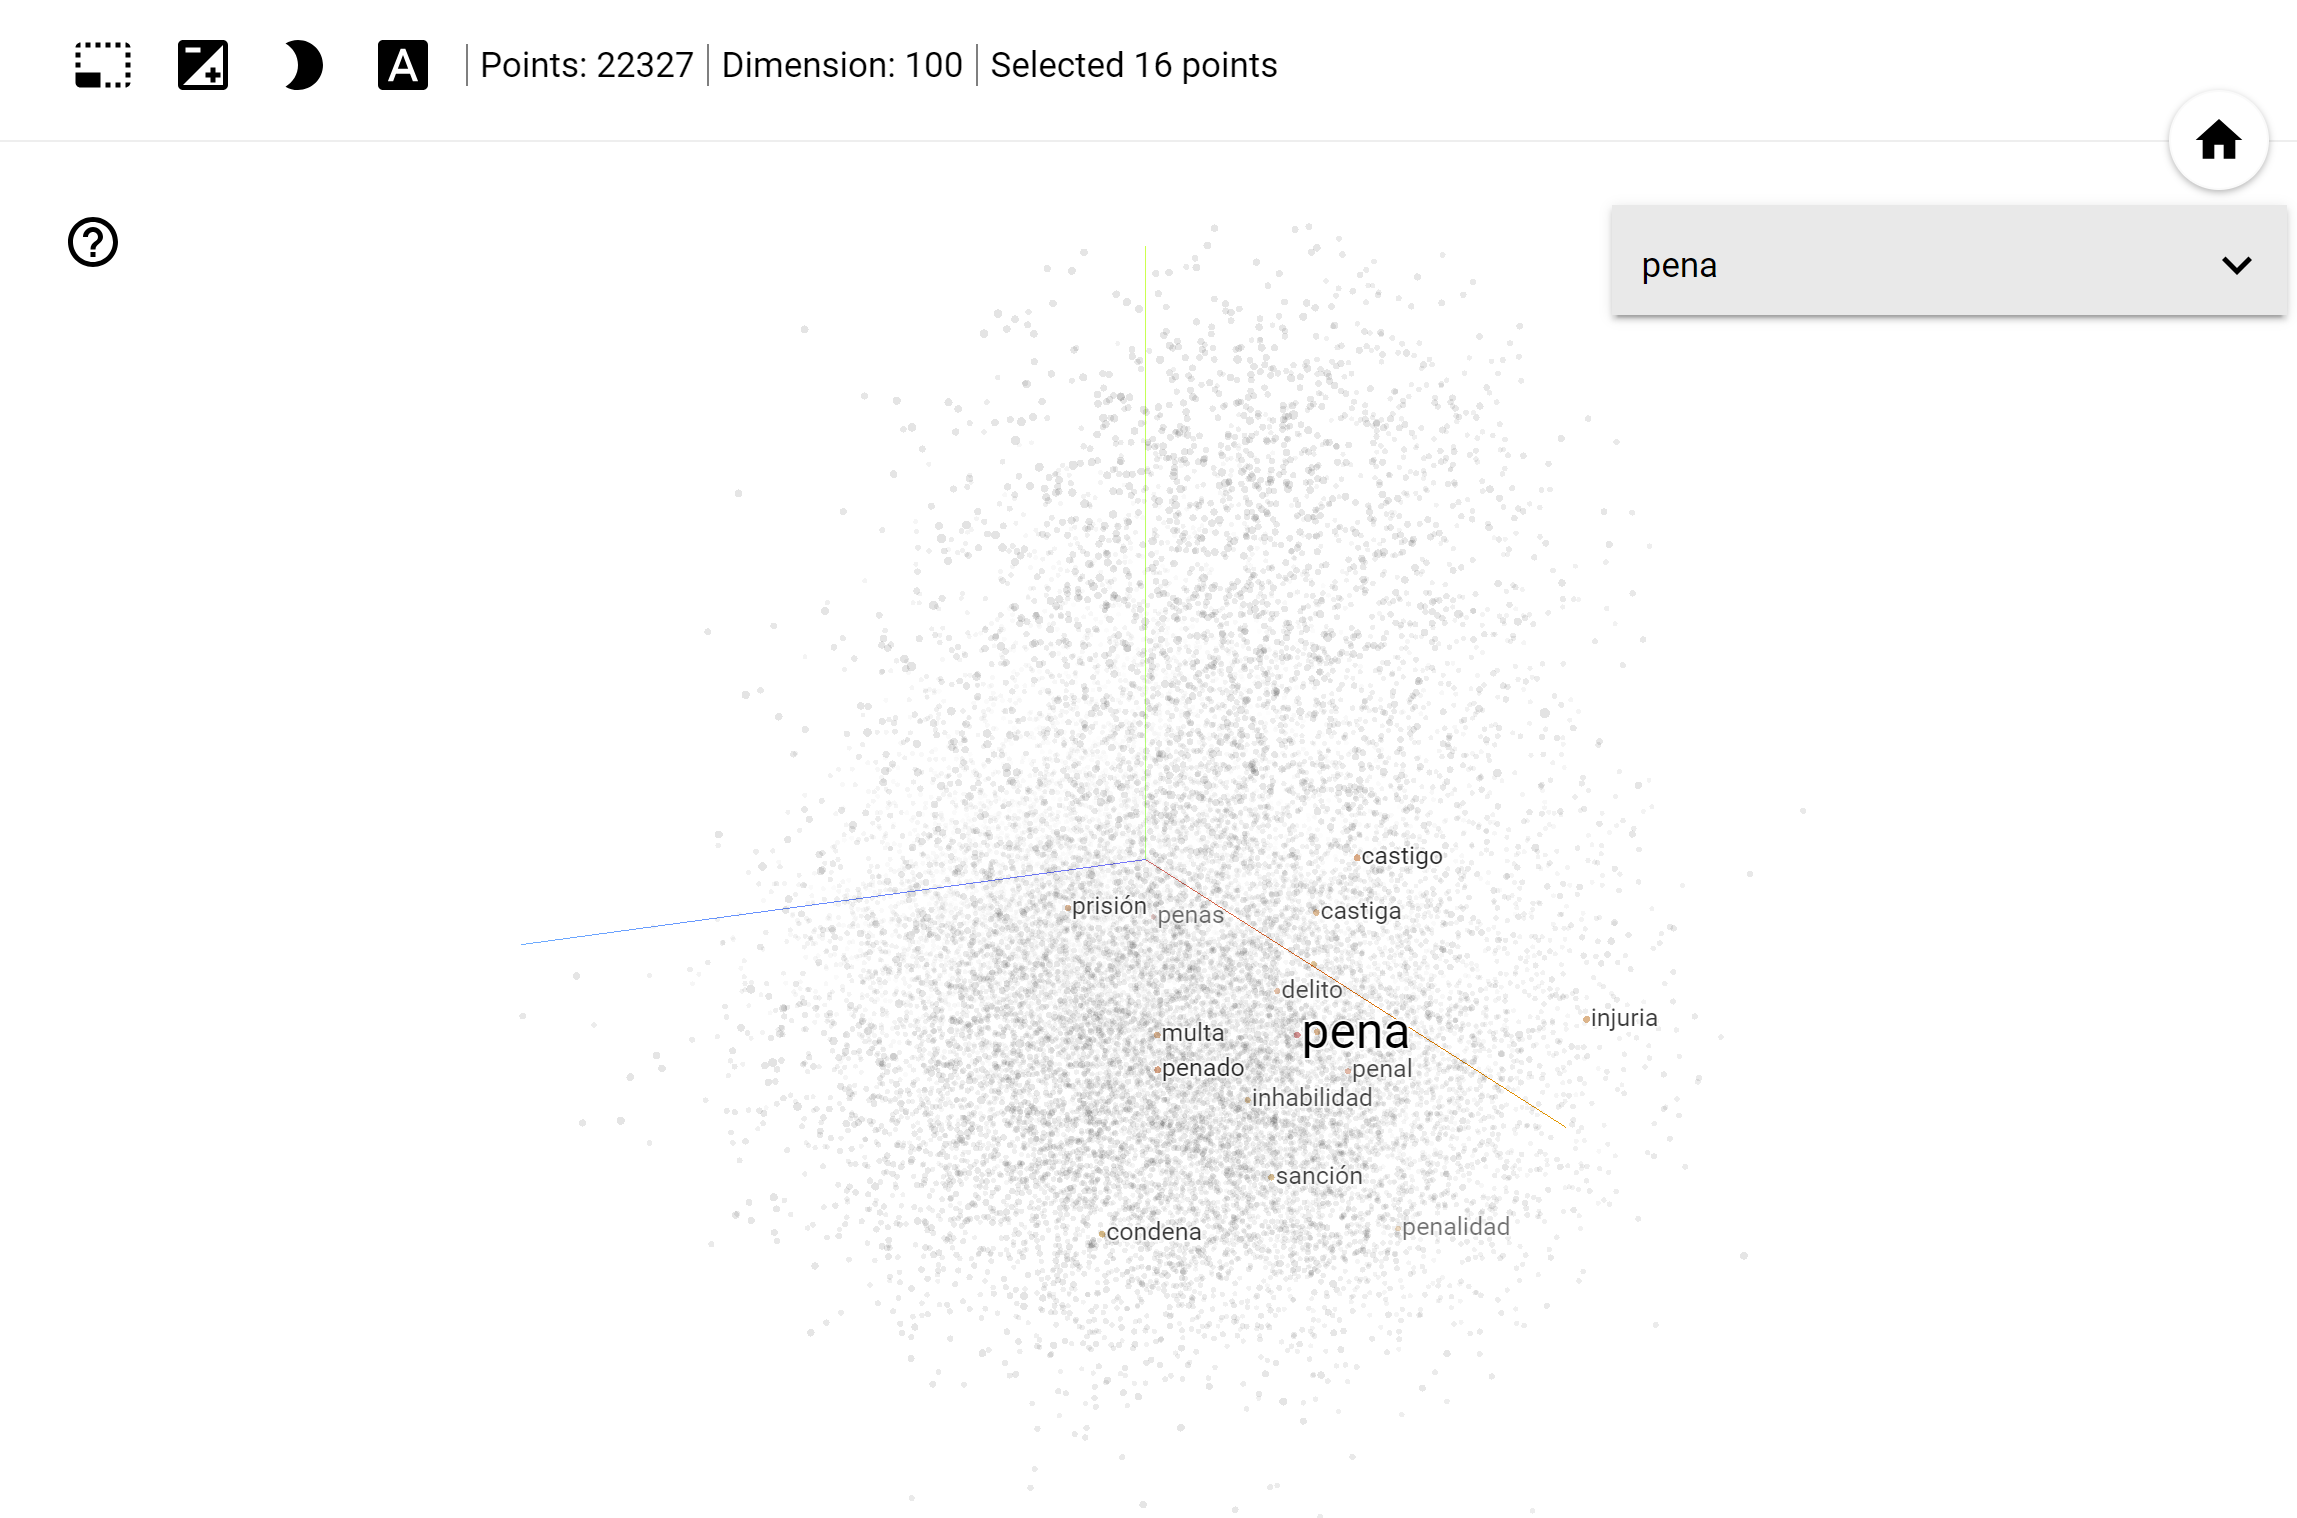

Para poder usar el Embedding Projector, tenemos que guardar la informacion en el formato adecuado. Necesitaremos importar dos archivos **.TSV**, uno que contiene los word embeddings y otro de metadatos que contiene la lista de palabras de nuestor vocabulario. De esta forma asocia la herramienta cada word embedding a su respectiva palabra.

La celda a continuacion se encarga de generar los archivos TSV, y descargarlos en local a tu ordenador.

In [ ]:
def is_printable(s):
    return all(char.isprintable() for char in s)

# Crear archivo TSV para embeddings y metadatos
with open('embeddings.tsv', 'w', encoding='utf-8') as vecs, open('metadata.tsv', 'w', encoding='utf-8') as meta:
    for word in modelo_legal.get_words():
          if not is_printable(word) or "\t" in word or "\n" in word:
            continue
          else:
            vector = modelo_legal.get_word_vector(word)
            vecs.write('\t'.join([str(x) for x in vector]) + '\n')
            meta.write(word + '\n')

print("Archivos TSV creados correctamente.")

# Crear un archivo ZIP y descargarlo
with zipfile.ZipFile('embeddings.zip', 'w') as myzip:
    myzip.write('embeddings.tsv')
    myzip.write('metadata.tsv')

print("Archivos añadidos al ZIP correctamente.")
files.download('embeddings.zip')

Archivos TSV creados correctamente.
Archivos añadidos al ZIP correctamente.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

El archivo 'embeddings.zip' se descargara en local en tu ordenador. A continuacion, descomprime este archivo en local y carga los archivos a [Embedding Projector](https://projector.tensorflow.org/). Para ello, utiliza el boton *Load* en la parte izquierda de la web (remarcado en rojo en la imagen). Cuando subas los archivos 'embeddings.tsv' y 'metadata.tsv' descomprimidos, deberias ver que estan cargados correctamente en la web (remarcado en azul en la imagen).

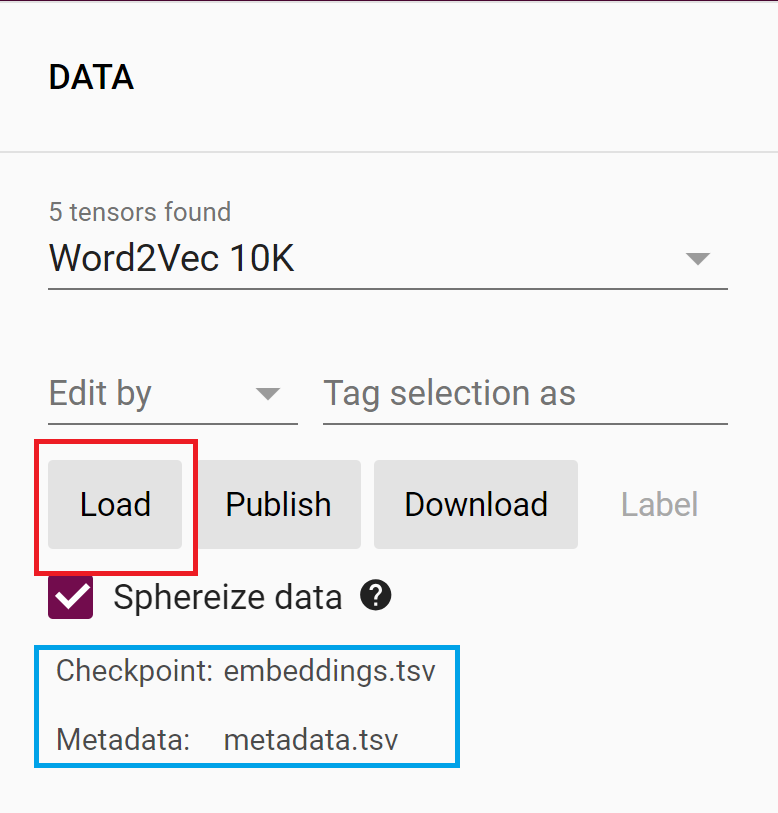

Despues de cargar los embeddings, aparece la nube de puntos que utiliza el algoritmo PCA de reduccion de dimensionalidad. Para analizar el espacio vectorial de nuestro modelo, utilizaremos **T-SNE**. Selecciona la opcion T-SNE y entrena el algoritmo con los siguientes parametros:
- Perplejidad entre 28 y 32.
- Learning rate 0.1
- Entrena durante ~600 iteraciones.

A partir de las ~600 iteraciones, veras que el algoritmo empieza a converger y la forma de la nube de puntos deja de actualizarse.

⏰ Procesar las ~600 iteraciones del algoritmo T-SNE puede llevar hasta ~7 minutos.


><font color='blue' size= 2><b>Nota</b>: En las figuras siguiente se presentan capturas de pantalla del algoritmo entrenado mostrando las 20 palabras más cercanas a la palabra <b>juez</b>.


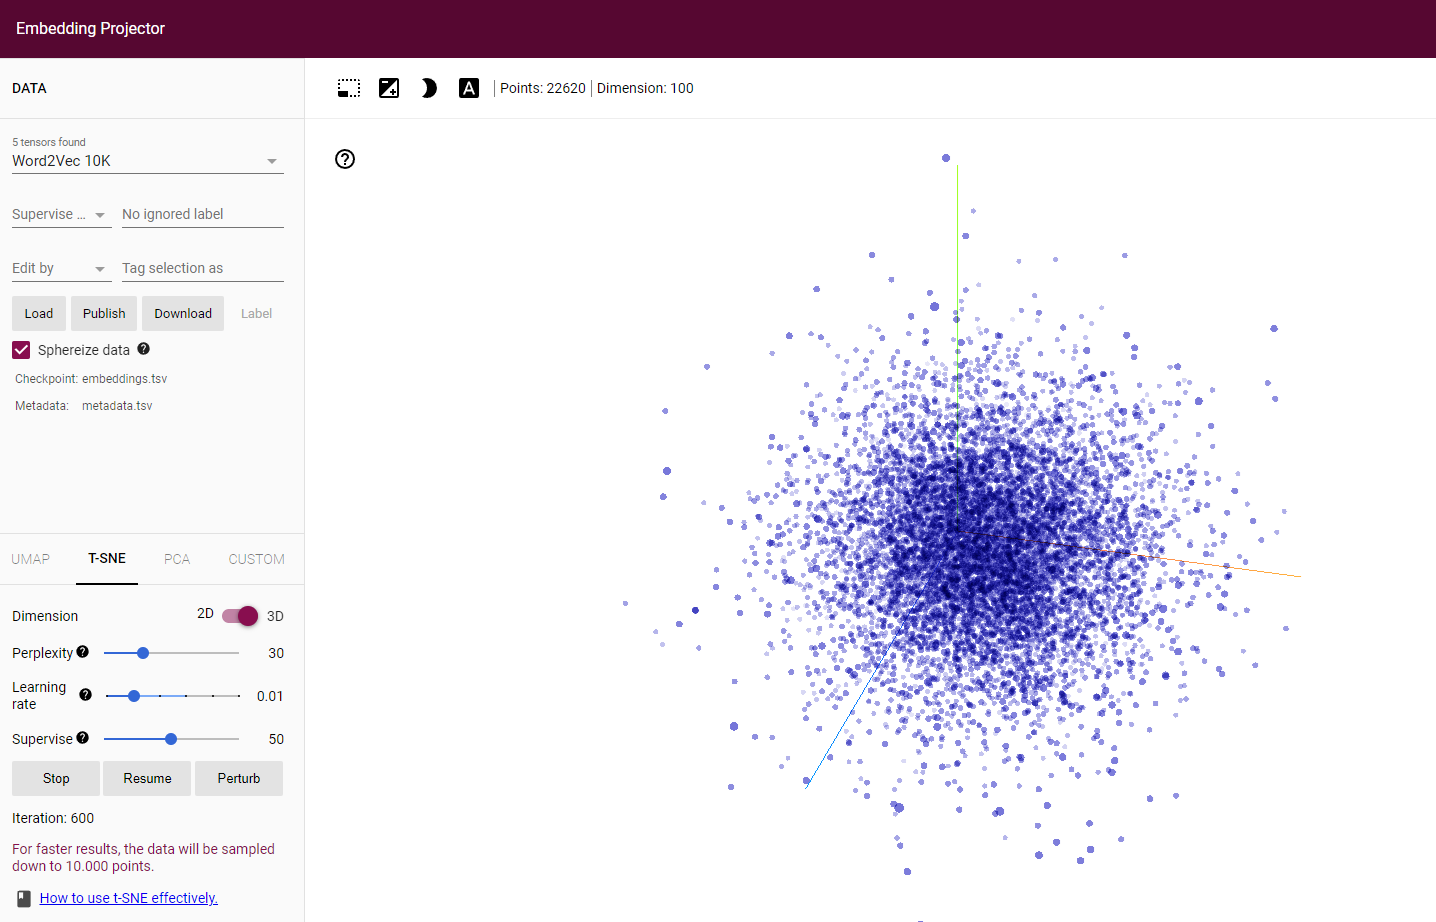

In [ ]:
img = Image.open('/content/drive/My Drive/Practica2/Figuras/Embedding_projector.png')
display(img)

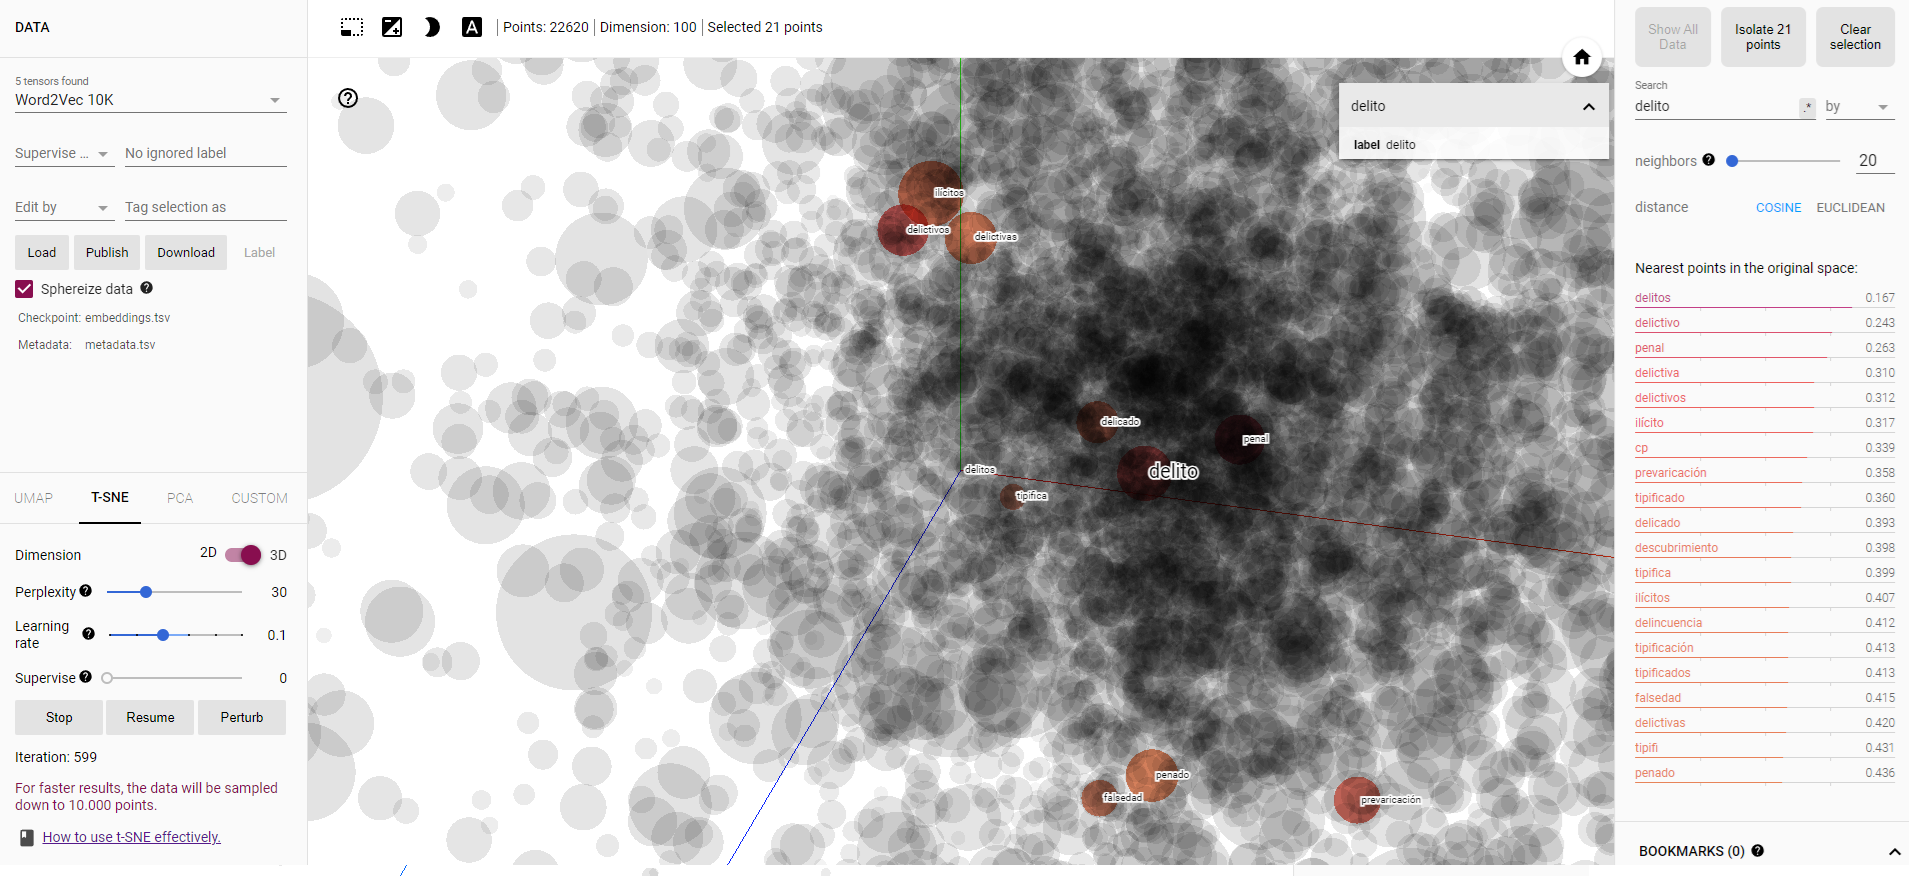

In [ ]:
img = Image.open('/content/drive/My Drive/Practica2/Figuras/Embedding_projector2.png')
display(img)

Explora el espacio vectorial resultado del T-SNE y responde las siguientes preguntas.

1. Segun tu exploracion ¿como han quedado relacionadas las palabras? ¿el agrupamiento es morfologico? ¿semantico?
2. ¿Eres capaz de encontrar algun cluster semantico? Si es asi, menciona las palabras que participan en el cluster.
3. ¿Que significa que haya palabras en un mismo cluster?
4. ¿Hay *outliers* (valores atipicos) en la representacion? ¿Estos valores atípicos se deben a anomalías en los datos, palabras raras o errores en el modelo?
5. ¿Que caracteristicas puedes encontrar en este espacio vectorial que identifiquen el dominio especifico (legal, juridico) del modelo?

❗**Ten en cuenta la siguiente informacion**. T-SNE es un algoritmo que mapea los datos en un espacio de baja dimensión (3D en nuestro caso) de manera que los datos que están cerca en el espacio original están generalmente cerca en el espacio reducido. Este algoritmo es util para poder visualizar nuestra vectorizacion de palabras, pero tiene sus desventajas. El analisis sobre cualquier conjunto de datos sometido a reduccion de dimensionalidad tiene que ir acompanado de una mirada critica y casi esceptica. Todos estos algoritmos implican perdida de informacion. T-SNE en particular, genera distancias entre los clusters que no son significativas -- que un cluster este mas cerca a otro no significa que sea mas parecido a uno que este lejos. Ademas, el tamano de cada cluster tampoco es significativo -- si los datos (palabras) de un cluster estan mas juntos o dispersos.

<font color='blue' size= 2>
<b>Respuesta</b>:
<ul>
<font color='blue' size= 2>
<li><b>Agrupamiento</b>. Como se puede ver en la figura anterior, entre las palabras más cercanas a la palabra escogida, <i>delito</i>, algunas tienen características morfológicas y semánticas similares (p.ej. <i>delitos</i> o <i>delictivo</i>). Sin embargo, gracias a la capcidad de <i>Word2Vec</i> de <b>"capturar relaciones contextuales entre palabras</b>, el modelo está realizando un agrupamiento semántico entre palabras sin parecido morfológico (p.ej. <i>prevaricación</i> o <i>ilícitos</i>). De hecho, la agrupación semántica viene dada por el resultado de aplicar la funcion <i>Softmax</i> sobre los coeficientes del vector de pesos de salida. Finalmente, la palabra <i>delicado</i> no parence tener relación semántica y quizás represente las <b>limitaciones del modelo</b>.<br><br>

<li><b>Cluster semántico</b>. La verdad es que yo empecé a intuir agrupamientos a partir de las 800 iteraciones aproximadamente. En la figura de abajo se presenta la nube de datos con los agrupamientos de palabras roadeados por círculos de colores. El que está rodeado por el círculo rojo contiene palabras que, <b>si bien no son semanticamente similares, tienen en común que todas son palabras en inglés</b>.</li><br>

<li><b>Valores atípicos</b>. Generalmente, se entiende por valor atípico leve (extremo), aquel cuyo valor dista de la media de la distribución mas de 1.5 (3) veces el rango interquartil, $IQR = Q_{3}-Q_{1}$. $^{1}$ En este caso sin embargo, entiendo que por atípico se entiende palabras cuyas vecinos más cercanas están a una distancia superior a un valor umbral determinado. Un pequeño ejemplo se propone una celdas más abajo.<br><br>
Por otra parte, usando "Embedding Projector" podemos ver algunas palabras que se encuentran a distancias particularmente grandes de sus vecinos cercanos. Por ejemplo, <i>coetáneos</i> o <i>torticera</i>, que son términos <b>poco frecuentes</b> en el lenguage común y (creo) también en el lenguage jurídico. Otros ejemplos de valores atípicos son p.ej. <i>titulosvalores</i> (todo junto) e <i>incorporated</i>. El primero puede representar un error tipográfico en el corpus, i.e. <b>anomalías en los datos</b>. En el segundo caso es interesante ya que, a pesar de ser una palabra no española, el modelo es capaz de agruparla en torno a palabras españolas semánticamente parecidas. Entiendo que esto es debido a la facilidad que tiene <i>fasttext</i> para gestionar las palabras OOV gracias a que trabaja con n-gramas de palabras.<br>
<br><br>    

<li><b>Características específicas</b>. Ciertamente, el modelo se entrenó con textos pertenecientes al ámbito jurídico. Por lo tanto, es normal que se conporte de forma distinta al modelo trechamente relacionadas con términos jurídicos. Además, estos términos están relacionados según la cercanía/contexto en el que suelen aparecer en este lenguage. Por ejemplo, <i>prevaricación</i> aparecen de forma muy frecuente junto a <i>delito</i> y por eso el modelo les confiere una relación de cercanía.
</ul>
</font><br><br>
<font color='blue' size= 1.5>
$^{1}$ En este caso, tomaremos como atípicos aquellos cuyas palabra más cercana tenga un índice de similitud inferior a Q1.

In [ ]:
# Investigaciñon de valores atípicos
palabras = []
limited_dataset_reducido = limited_dataset.take(1000) # Reducimos más aun el tamaño del dataset
for texto in limited_dataset_reducido:
  processed_text_limited = preprocess_text(texto['Data']) # Procesamos el dataset
  pal = processed_text_limited.split() # Creamos el conjunto de palabras
  for p in pal:
    palabras.append(p) # Creamos el conjunto de palabras. Hacemos un bucle anidado para que palabras sea una lista y no una lista de listas

print(len(palabras))

similitudes = []
words = []
closest_words = []

for palabra in palabras: # Iteramos sobre el conjunto de palabras creadas
  similitud =  modelo_legal.get_nearest_neighbors(palabra, 1) # Calculamos el indice de similitud de la palabra mas cercana a cada palabra del conjunto
  similitudes.append(similitud[0][0]) # Construimos un vector con todos los valores de similitud
  words.append(palabra)
  closest_word = similitud[0][1]
  closest_words.append(closest_word)
  print(Fore.BLUE + f'La palabra más cercana a "{palabra}" es "{closest_word}" y tiene un índice de similitud de "{round(similitud[0][0], 4)}"\n')

print(Fore.BLUE + f'En el subconjunto de texto elegido, la máxima similitud es {max(similitudes)} y la mínima es {min(similitudes)}')
distancia_minima = min(distancias)

Streaming output truncated to the last 5000 lines.

La palabra más cercana a "la" es "mismola" y tiene un índice de similitud de "0.8217"

La palabra más cercana a "cuestión" es "cuestiónla" y tiene un índice de similitud de "0.9489"

La palabra más cercana a "que" es "se" y tiene un índice de similitud de "0.8056"

La palabra más cercana a "aquí" es "ahora" y tiene un índice de similitud de "0.7811"

La palabra más cercana a "se" es "que" y tiene un índice de similitud de "0.8056"

La palabra más cercana a "trata" es "trataen" y tiene un índice de similitud de "0.806"

La palabra más cercana a "posible" es "plausible" y tiene un índice de similitud de "0.7765"

La palabra más cercana a "resolución" es "resoluciónen" y tiene un índice de similitud de "0.9197"

La palabra más cercana a "de" es "la" y tiene un índice de similitud de "0.8041"

La palabra más cercana a "la" es "mismola" y tiene un índice de similitud de "0.8217"

La palabra más cercana a "cesión" es "cedex" y tiene un índi

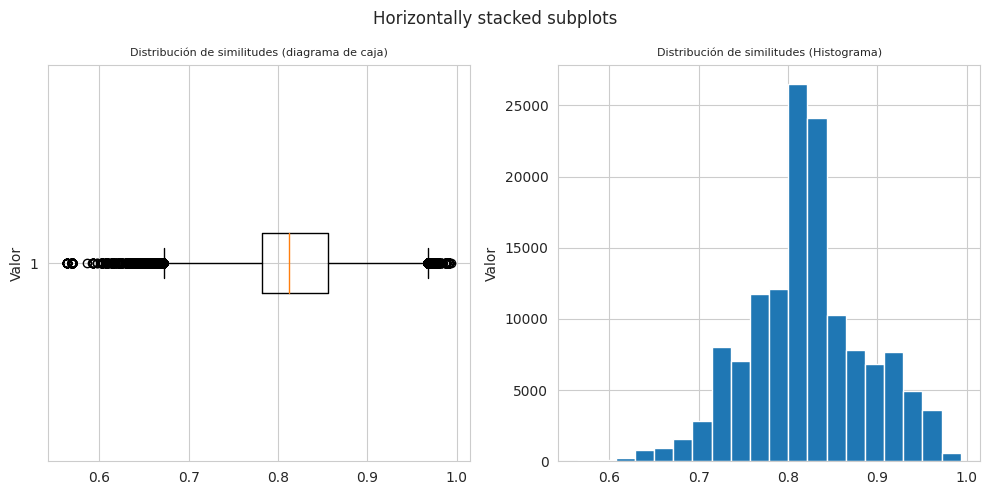

137938
137938


count    137938.000000
mean          0.819116
std           0.066472
min           0.564364
25%           0.782398
50%           0.812357
75%           0.856368
max           0.993272
Name: similitud, dtype: float64

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Horizontally stacked subplots')
plt.tight_layout()

# El diagrama de cajas nos da información gráfica y muy directa del rango interquartil
ax1.set_title('Distribución de similitudes (diagrama de caja)', fontsize=8)
ax1.set_ylabel('Valor')
ax1.boxplot(similitudes, vert=False, manage_ticks=True)
ax1.x_axis=False

# El histograma nos da mejor información sobre los detalles de la distribución de valores de similitud
ax2.hist(similitudes, bins=20)
ax2.set_title('Distribución de similitudes (Histograma)', fontsize=8)
ax2.set_ylabel('Valor')
plt.show()

print(len(similitudes))
print(len(palabras))
X = pd.DataFrame(data={'palabra':words, 'palabra_:cercana': closest_words, 'similitud':similitudes})
X['similitud'].describe()

In [ ]:
# Establecemos como criterio de valor atípico 0.78

Q1 = X['similitud'].quantile(0.25)

a  = 0
i = 0
for item in similitudes:
  if item <= Q1:
    print(Fore.BLUE + f'   La palabra más cercana a "{words[a]}" es "{closest_words[a]}" y tiene un índice de similitud de "{round(item, 4)}"')
    i = i + 1
  a = a + 1

Se han truncado las últimas 5000 líneas del flujo de salida.
   La palabra más cercana a "propio" es "el" y tiene un índice de similitud de "0.7587"
   La palabra más cercana a "y" es "cfart" y tiene un índice de similitud de "0.7604"
   La palabra más cercana a "con" es "de" y tiene un índice de similitud de "0.7233"
   La palabra más cercana a "y" es "cfart" y tiene un índice de similitud de "0.7604"
   La palabra más cercana a "técnicas" es "éticas" y tiene un índice de similitud de "0.7752"
   La palabra más cercana a "s" es "l" y tiene un índice de similitud de "0.7806"
   La palabra más cercana a "a" es "al" y tiene un índice de similitud de "0.7652"
   La palabra más cercana a "fue" es "había" y tiene un índice de similitud de "0.7297"
   La palabra más cercana a "por" es "tanto" y tiene un índice de similitud de "0.724"
   La palabra más cercana a "para" es "ivpara" y tiene un índice de similitud de "0.7485"
   La palabra más cercana a "limpieza" es "limpio" y tiene un índice d

In [ ]:
print(Fore.BLUE + f'   El número de palabras atípicas en el subconjunto selecionado es: {i}')

   El número de palabras atípicas en el subconjunto selecionado es: 34485


<font color='blue' size=2>
Vemos entonces que, según el criterio definido (similitud < Q1) y en el subconjunto elegido (1000 textos) <b>existe un número considerable de datos atípìcos</b>.

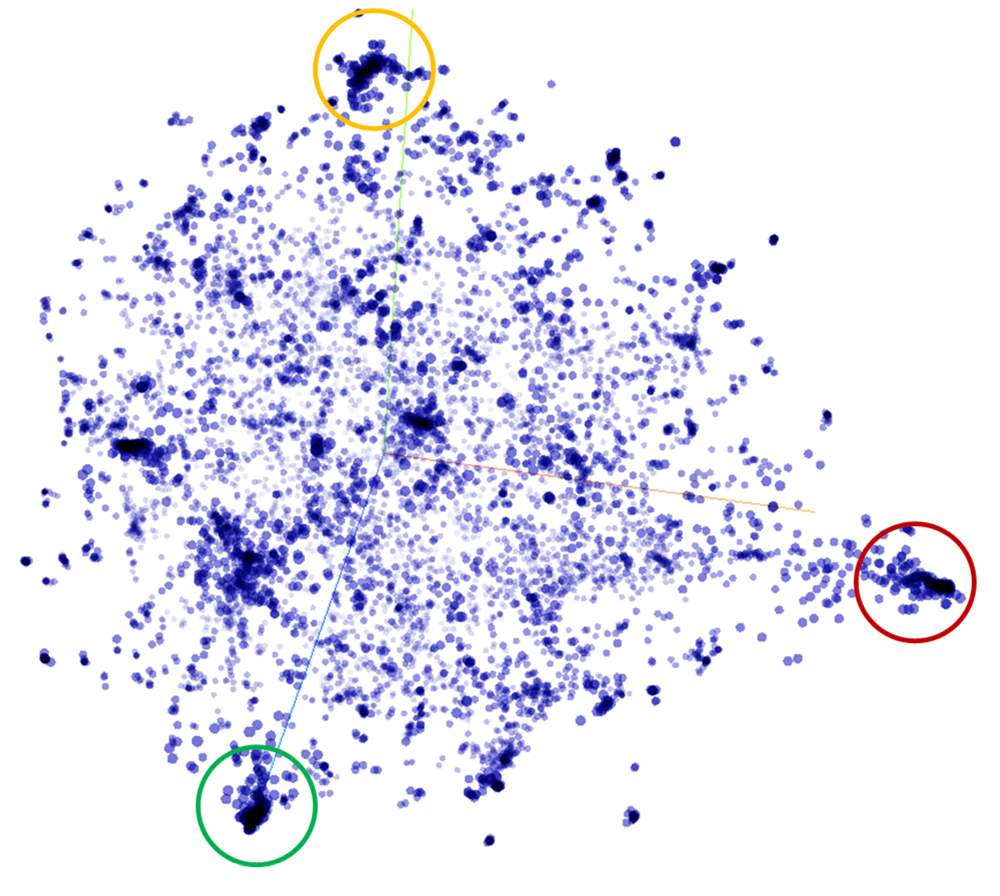

In [ ]:
img = Image.open('/content/drive/My Drive/Practica2/Figuras/Agrupamiento.png')
display(img)

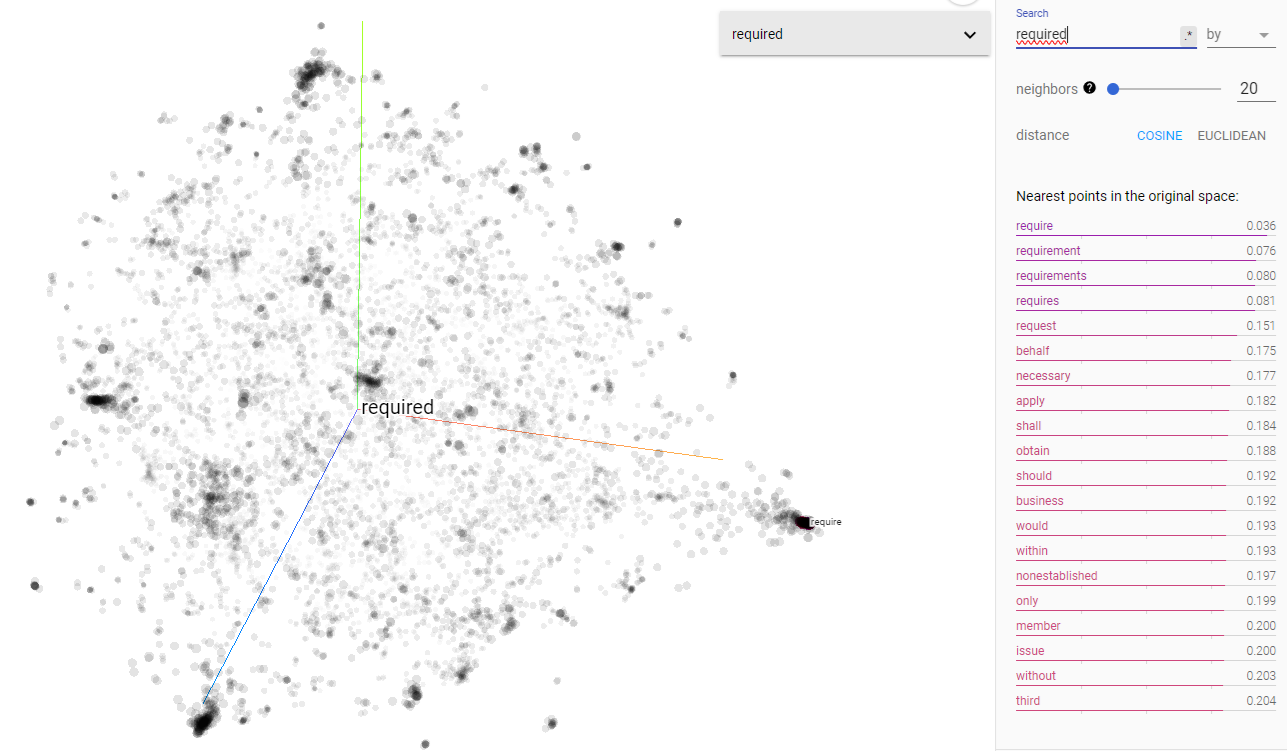

In [ ]:
img = Image.open('/content/drive/My Drive/Practica2/Figuras/Agrupamiento1.png')
display(img)

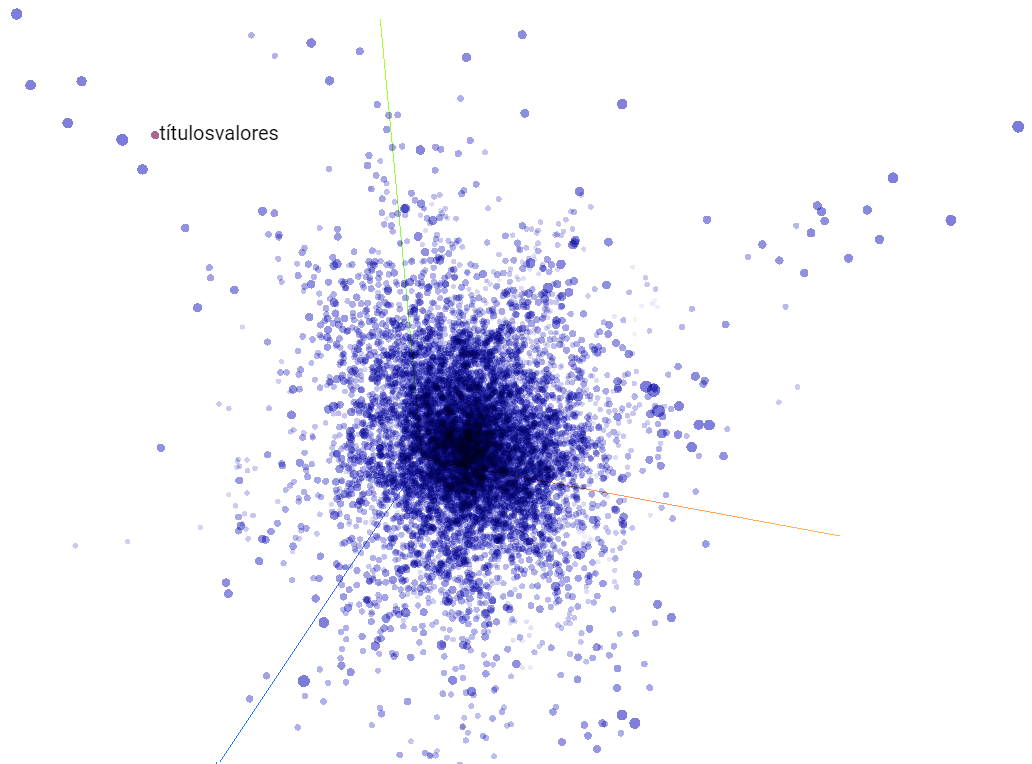

In [ ]:
img = Image.open('/content/drive/My Drive/Practica2/Figuras/atipico1.png')
display(img)

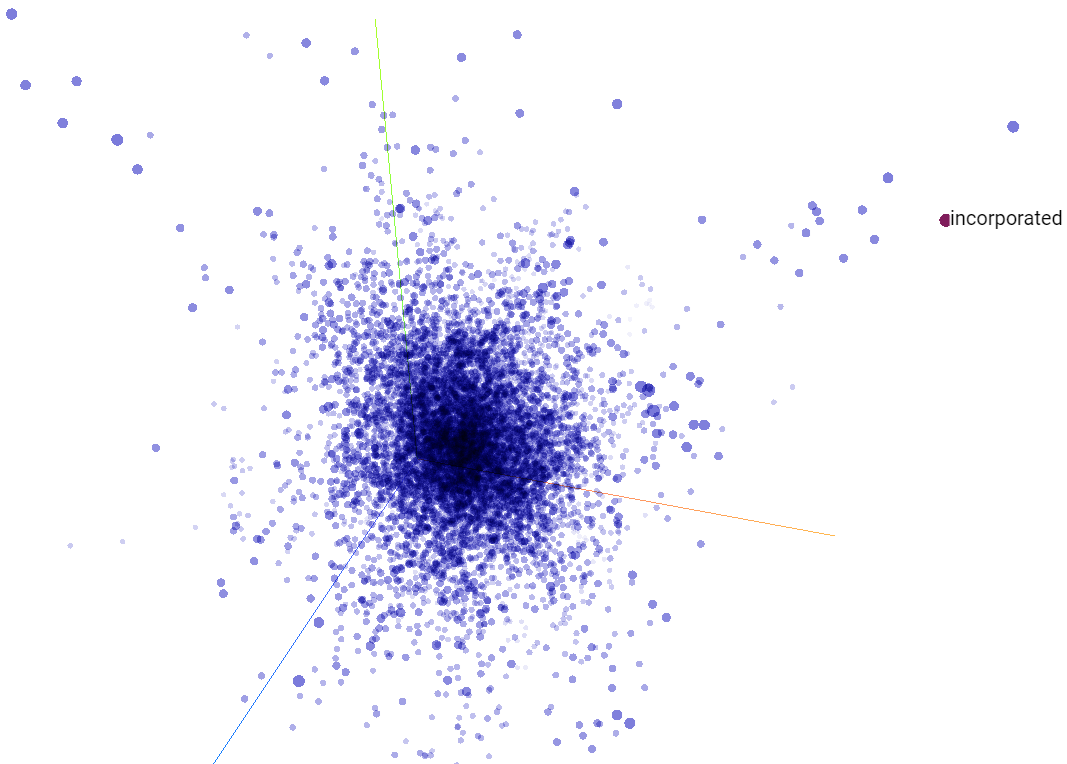

In [ ]:
img = Image.open('/content/drive/My Drive/Practica2/Figuras/atipico2.png')
display(img)

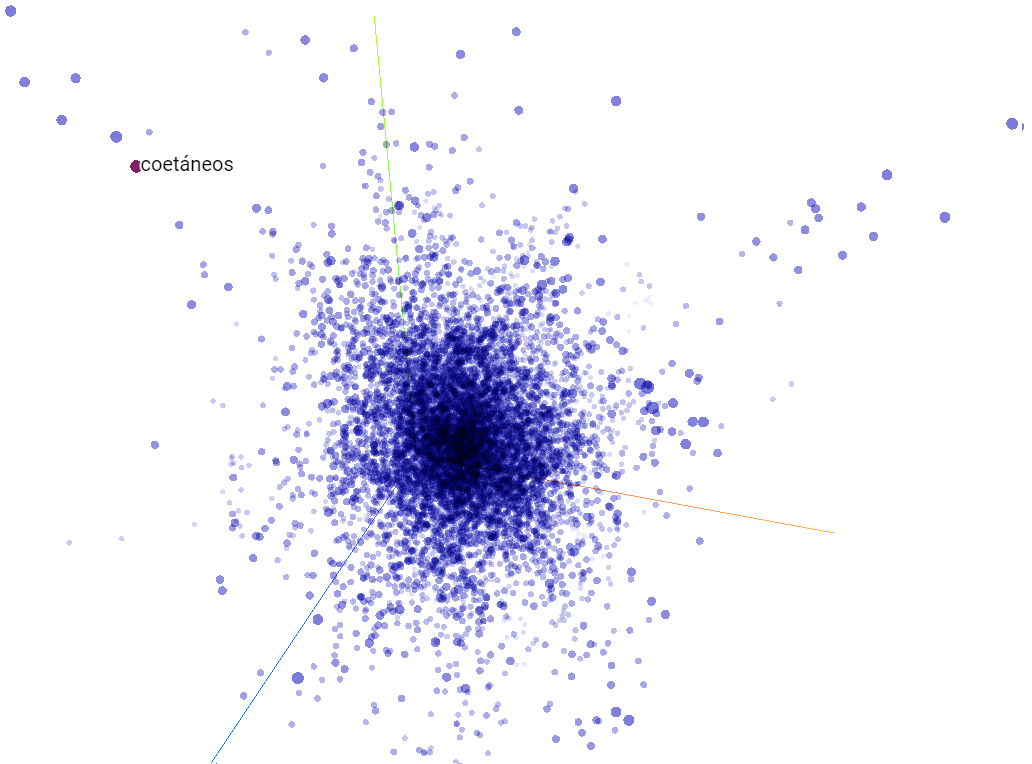

In [ ]:
img = Image.open('/content/drive/My Drive/Practica2/Figuras/atipico3.png')
display(img)

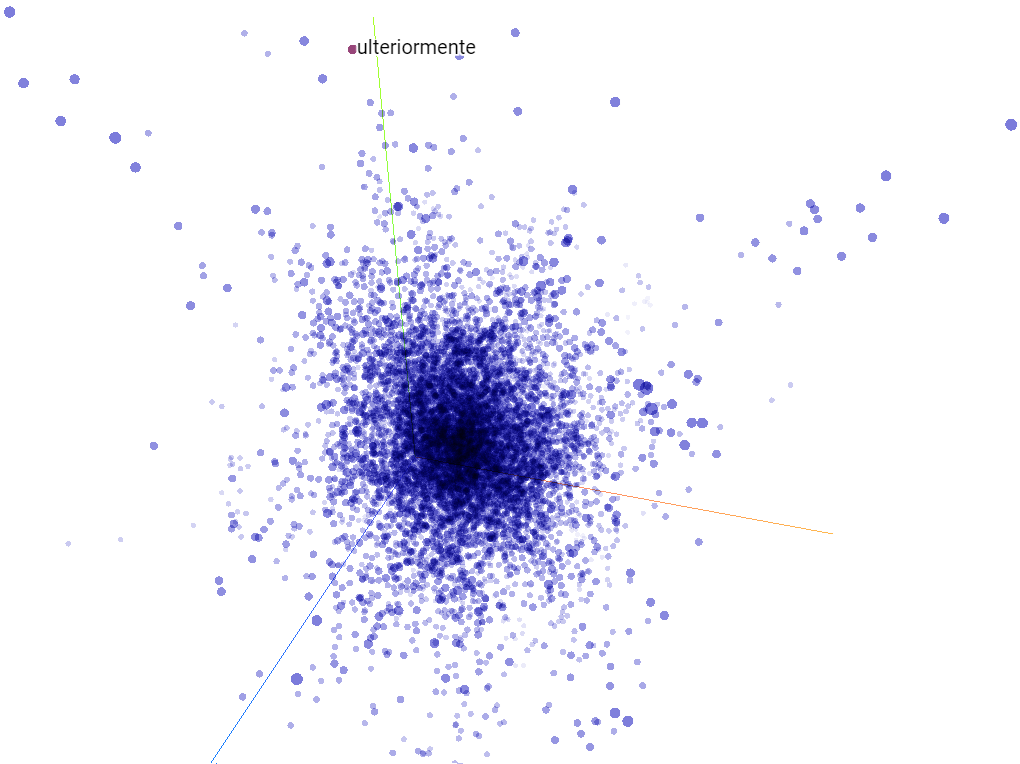

In [ ]:
img = Image.open('/content/drive/My Drive/Practica2/Figuras/atipico3_2.png')
display(img)

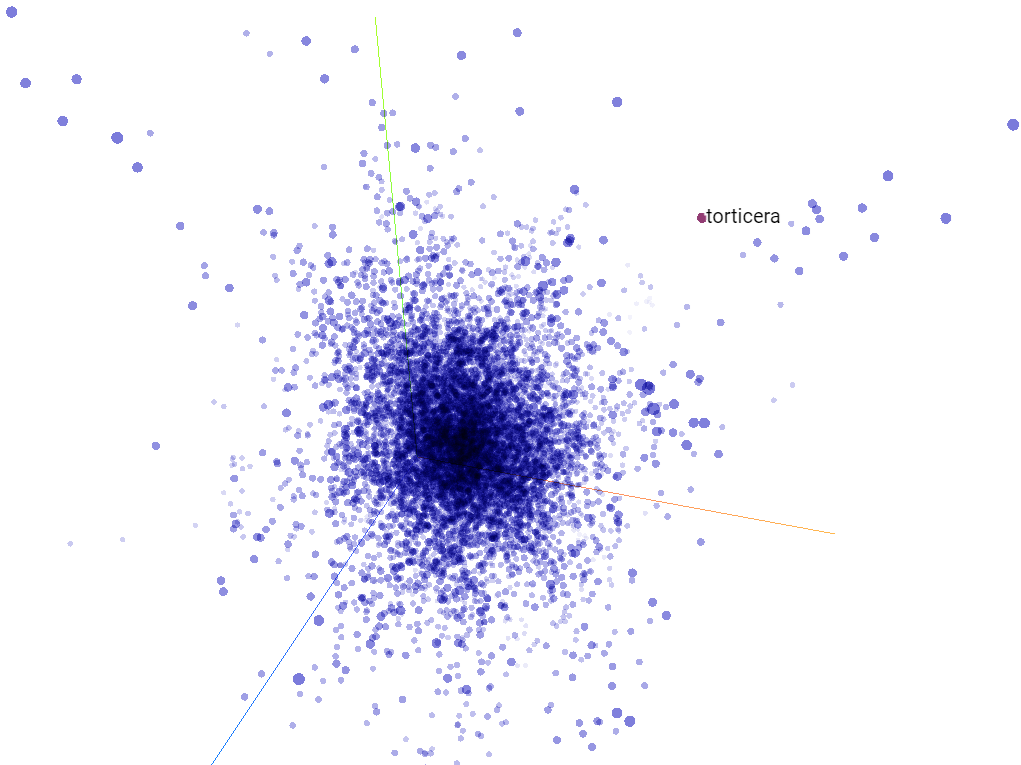

In [ ]:
img = Image.open('/content/drive/My Drive/Practica2/Figuras/atipico3_3.png')
display(img)

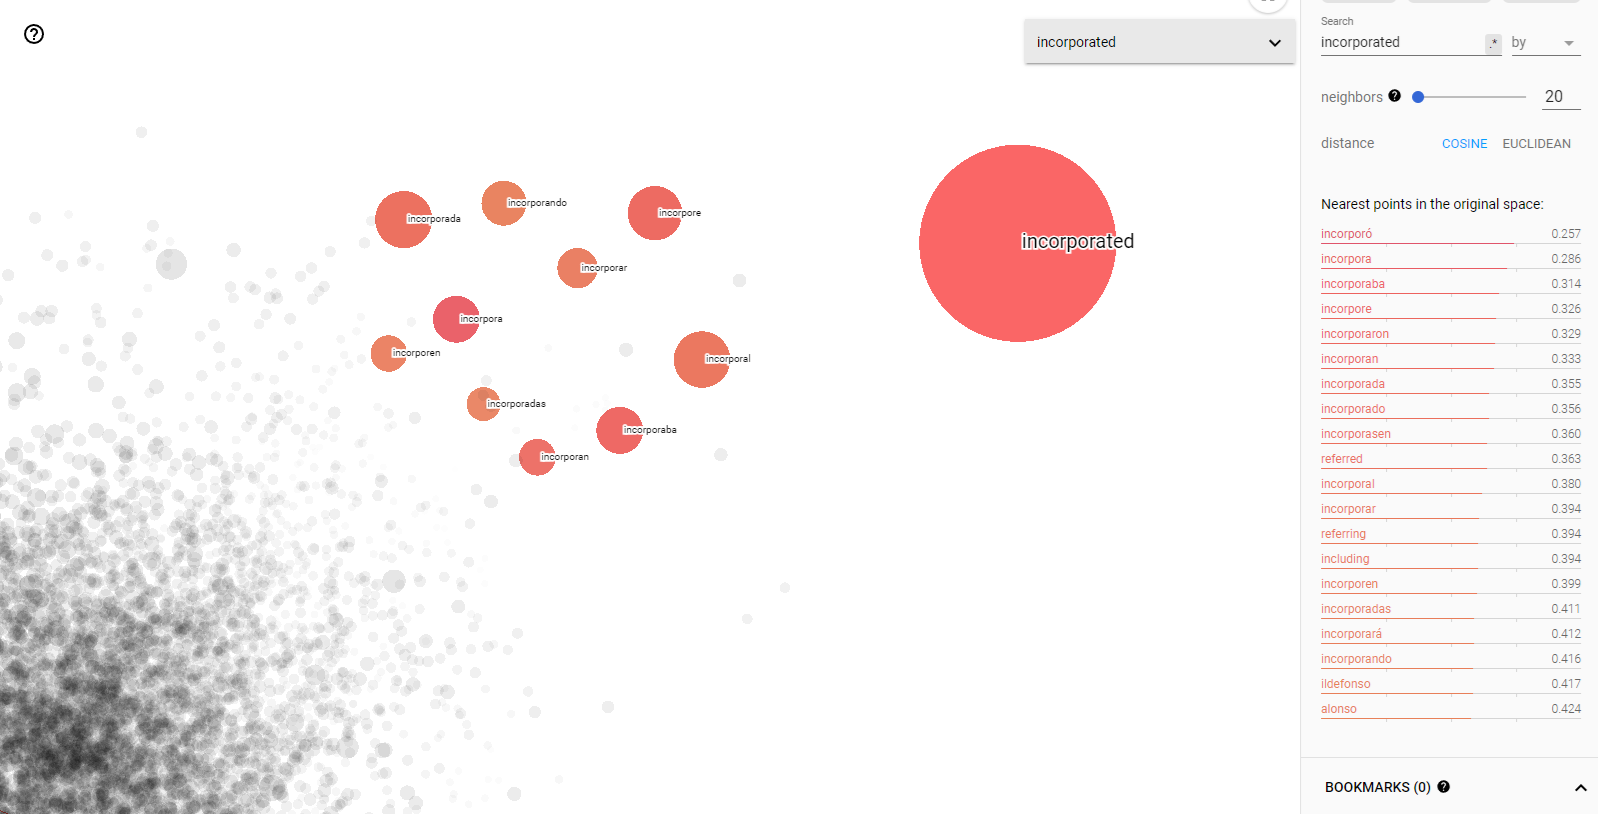

In [ ]:
img = Image.open('/content/drive/My Drive/Practica2/Figuras/incorporated.png')
display(img)

## Hugging Face 🤗

En la segunda parte de la practica, vamos a utilizar la libreria HuggingFace 🤗. Esta es la libreria NLP mas utilizada hoy en dia, compartiendo una gran cantidad de modelos y datos. A continuacion, instalaremos las librerias necesarias. `Transformers` es la libreria *opensource* de HuggingFace 🤗 que nos permitira manejar modelos basados en la arquitectura transformers. La libreria `datasets` la utilizaremos para manejar los datos, y `evaluate` lo utilizaremos para funcionalidades de evaluacion de los modelos.

In [4]:
!pip install transformers[torch] datasets evaluate

### Ejercicio 4

---



La libreria `transformers` de HuggingFace 🤗 proporciona un modulo llamado [Pipeline](https://huggingface.co/docs/transformers/main_classes/pipelines). Esta herramienta sirve como una caja de herramientas de modelos NLP pre-entrenados. Pipeline simplifica la computacion que hay detras de los modelos de lenguaje que veremos mas adelante. La gran ventaja de esta herramienta, es que permite a desarrolladores probar cualquier modelo open-source pre-entrenado que cualquier persona haya subido a la libreria, ademas de manera sencilla y directa.

In [6]:
from transformers import pipeline

Para utilizar `pipeline`, el primer argumento `task` define el tipo de tarea NLP que se desea realizar y el segundo `model` especifica el modelo pre-entrenado para realizar la tarea. Si no especificas modelo, el modulo `pipeline` proporciona un modelo por defecto para cada tarea NLP. Fijaros en el siguiente codigo para generar texto utilizando el modelo GPT-2 de generacion de texto:

In [38]:
# Usar Pipeline para cargar un tipo de tarea NLP y un modelo
generator = pipeline(task = 'text-generation', model = 'gpt2')

# Generar texto en ingles con GPT-2
prompt = "Hello, my name is"
generated_text = generator(prompt, max_length=25, truncation=True)

print('Generated text: \n')
print(generated_text[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated text: 

Hello, my name is Daniel. I am from the United States of America. I belong to this community in the area "


Los modelos disponibles en HuggingFace 🤗 se pueden ver en el apartado [Models](https://huggingface.co/models) de su pagina web, donde se pueden filtrar modelos por tareas, lenguaje, etc. Las tareas NLP predefinidas se pueden encontrar en la informacion del argumento `task` de `pipelines`, en la documentacion de la libreria [transformers.pipeline](https://huggingface.co/docs/transformers/main_classes/pipelines).

A continuacion, implementa el codigo que realice un **analisis de sentimiento** para un texto en ingles, usando cualquier modelo pre-entrenado de HuggingFace 🤗. Imprime el resultado por pantalla.

In [39]:
text = "I love using HuggingFace transformers Pipelines. They simplify complex NLP tasks."

# Tu codigo aqui

! pip install colorama
from colorama import Fore, Back, Style

tarea = pipeline(task = 'sentiment-analysis') # Definimos el "pipeline"
sentimiento = tarea(text) # Aplicamos el "pipeline" al texo
respuestas = list(sentimiento[0].values()) # Como solo tenemos una oración, tomamos el primer elemento de la lista

# Imprimimos en pantalla
print(Fore.BLUE + f'\n    The sentiment of the sentence is {respuestas[0]} with a probability of {round(respuestas[1], 4)*100} %')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.



    The sentiment of the sentence is POSITIVE with a probability of 96.6 %


Ahora realiza la misma tarea para hacer un **reconocimiento de entidades nombradas** (NER) al texto dado. Puedes usar, por ejemplo, [este modelo](https://huggingface.co/dslim/bert-base-NER). Imprime el resultado por pantalla.

In [40]:
text = "I am Harry, based in London working on consulting at KPMG"

# Tu codigo aqui
from transformers import AutoTokenizer, AutoModelForTokenClassification
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")
nlp = pipeline("ner", model=model, tokenizer=tokenizer) # creamos el "pipeline"

ner_results = nlp(text) # Aplicamos el "pipeline" al texto
# Imprimimos los resultados más relevantes en pantalla
for resultado in ner_results:
  print(Fore.LIGHTBLUE_EX + f'\n   El token "{resultado["word"]}" es tipo "{resultado["entity"]}" con una probabilidad del "{round(resultado["score"]*100, 2)} %"')

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



   El token "Harry" es tipo "B-PER" con una probabilidad del "99.69 %"

   El token "London" es tipo "B-LOC" con una probabilidad del "99.96 %"

   El token "K" es tipo "B-ORG" con una probabilidad del "99.9 %"

   El token "##PM" es tipo "I-ORG" con una probabilidad del "97.6 %"

   El token "##G" es tipo "I-ORG" con una probabilidad del "98.77 %"


<font color='blue' size= 2>
   Parece ser que <b>KPMG</b> no pertenece al volculabulario de BERT. Por lo tanto, este tokeniza "K", "PM" y "G" como tokens individuales. Así, asocia a a "K", el prefijo "-B" (comienzo) y a "PM" y "G" los "-I" (intermedios). Esto se puede solucionar añadiendo <b>KPMG</b> al volcabulario de BERT, como se muestra en la celda siguiente.

In [41]:
text = "I am Harry, based in London working on consulting at KPMG"

new_tokens = ['KPMG']
tokenizer.add_tokens(new_tokens) #Añadimos KPMG al vocabulario de BERT
model.resize_token_embeddings(len(tokenizer)) # Aumentamos el tamaño de los embeddings del modelo

# Repetimos el proceso de la celda anterior
nlp = pipeline("ner", model=model, tokenizer=tokenizer)
ner_results = nlp(text)
# Imprimimos los resultados más relevantes en pantalla
for resultado in ner_results:
  print(Fore.LIGHTBLUE_EX + f'\n   El token "{resultado["word"]}" es tipo "{resultado["entity"]}" con una probabilidad del "{round(resultado["score"]*100, 2)} %"')


   El token "Harry" es tipo "B-PER" con una probabilidad del "99.55 %"

   El token "London" es tipo "B-LOC" con una probabilidad del "99.97 %"

   El token "KPMG" es tipo "B-ORG" con una probabilidad del "88.65 %"


><font color='blue' size = 2><b>Nota</b>: No siempre el código de la celda anterior produce <b>"El token "KPMG" es tipo "B-ORG"</b>. En ocasiones hay que ejecutar la celda varias veces antes de conseguir este resultado.  

<font color='blue' size= 2>
      Para quitar los prefijos"-B" e "-I". Como en este caso no hay "-I", para demostrar la validez del método, cambiamos "London" por "San Francisco"

In [42]:
# Quitamos las etiquetas "B-"" e "-I"
text = "I am Harry, based in San Francisco working on consulting at KPMG"
nlp = pipeline("ner", model=model, tokenizer=tokenizer)
ner_results = nlp(text)
organized_results = {'LOC': [], 'PER': [], 'ORG': [], 'MISC': []}

current_entity = None
current_words = []

for result in ner_results:
    entity_type = result['entity'].split('-')[1]
    if result['entity'].startswith('B-'):
        if current_entity:
            organized_results[current_entity].append(' '.join(current_words))
        current_entity = entity_type
        current_words = [result['word']]
    elif result['entity'].startswith('I-') and current_entity == entity_type:
        current_words.append(result['word'])

# Handle the last entity
if current_entity:
    organized_results[current_entity].append(' '.join(current_words))

# Remove hash symbols from words
for key, value in organized_results.items():
    organized_results[key] = [' '.join(word.split('##')) for word in value]

print(Fore.LIGHTBLUE_EX + f'\n {organized_results}')



 {'LOC': ['San Francisco'], 'PER': ['Harry'], 'ORG': ['KPMG'], 'MISC': []}


Otra consecuencia interesante de utilizar `pipelines`, es que podemos utilizar los modelos como bloques de lego, poniendo uno encima de otro para resolver tareas NLP mas complejas de manera casi instantanea. Dado el siguiente documento, la tarea es utilizar modelos para:
1. Traducir el documento al ingles
2. Resumir el texto a una longitud maxima de 100 palabras
3. Realizar un analisis de sentimiento al resumen

In [12]:
documento = """
La economía global ha estado enfrentando desafíos significativos durante los últimos meses, incluyendo inflación alta y desempleo creciente.
Estos problemas han provocado preocupación generalizada, afectando a consumidores y empresas por igual. La incertidumbre en los mercados financieros ha llevado a una volatilidad extrema,
con fluctuaciones significativas en las bolsas de valores y en los precios de las materias primas. Además, la crisis sanitaria global continúa impactando la economía,
restringiendo la movilidad de las personas y alterando cadenas de suministro esenciales. Se espera que los líderes mundiales implementen medidas efectivas para estabilizar los mercados y promover un crecimiento económico sostenible.
La situación política en varias regiones ha agregado más incertidumbre al panorama económico, con conflictos internacionales y negociaciones comerciales tensas.
En respuesta, algunas naciones han aumentado sus gastos en infraestructura para estimular la economía, mientras que otras han optado por políticas de austeridad para controlar sus déficits.
Estas divergencias en las políticas económicas han generado debates sobre la mejor forma de enfrentar una recesión global, donde algunos expertos favorecen el estímulo fiscal y otros la prudencia financiera.
El impacto en la población ha sido variado, con algunos sectores experimentando una pérdida significativa de empleo, mientras que otros han logrado adaptarse rápidamente a la nueva normalidad.
El futuro económico global sigue siendo incierto, y se observa con atención la evolución de la situación para tomar decisiones informadas que puedan beneficiar a la mayoría.
"""

Paso 1. **Traduce el documento dado al ingles** e imprime el resultado por pantalla.

<font color ='blue' size = 2>
el modelo gpt2 no es adecuado para traducciones. Sin embargo, <b>Helsinki-NLP/opus-mt-es-en</b> es un modelo de la libreria <b>MarianMTModel</b> especificamente diseñado para tareas de traducción $^{1}$ (español-ingles). <b>El modelo preentrenado se incluye en la libreria <b>"transformers"</b> de HuggingFace</b>.<br>

<br>
<font color ='blue' size = 1.5>
$^{1}$ https://drlee.io/translate-text-from-any-language-to-any-language-with-hugging-face-transformers-and-google-colab-272876150a93




In [13]:
# Tu codigo aqui
from transformers import MarianTokenizer, MarianMTModel
import warnings
warnings.filterwarnings('ignore') # Deshabilitamos los "warnings"
import textwrap


texto_traducido = [] # "Limpiamos" la variable texto_traducido
model_name = 'Helsinki-NLP/opus-mt-es-en'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

traduccion = pipeline("translation", model=model, tokenizer=tokenizer) # creamos el "pipeline"
texto_traducido = traduccion(documento)

texto_traducido_2 =list(texto_traducido[0].values()) # extraemos los valores del diccionario del primer (y único) elemento de "texto_traducido"
texto_traducido_2 = str(texto_traducido_2) # Convertimos a una string para usar "textwrap"
parrafo = textwrap.fill(texto_traducido_2, width = 90) # Estructuramos el documento traducido en un parrafo de anchura 90 caracteres para facilitar su lectura
# Imprimimos en pantalla
print(Fore.BLUE + f'\n   El documento en inglés es:\n ')
print(Fore.LIGHTBLUE_EX + f'{parrafo}')


tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]


   El documento en inglés es:
 
['The global economy has been facing significant challenges over the past few months,
including high inflation and rising unemployment. These problems have caused widespread
concern, affecting consumers and businesses alike. Uncertainty in financial markets has
led to extreme volatility, with significant fluctuations in stock exchanges and commodity
prices. In addition, the global health crisis continues to impact the economy, restricting
people’s mobility and altering essential supply chains. World leaders are expected to
implement effective measures to stabilize markets and promote sustainable economic growth.
The political situation in several regions has added more uncertainty to the economic
landscape, with international conflicts and tight trade negotiations. In response, some
nations have increased their spending on infrastructure to stimulate the economy, while
others have opted for austerity policies to control their deficits. These divergences

Paso 2. Genera un  **resumen del texto** traducido, con un maximo de 100 palabras, e imprime el resultado por pantalla.

In [15]:
# Tu codigo aqui

resumen = []
resumen_2 = []
resumen_parrafo = []

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
resumen = summarizer(parrafo, max_length=100, min_length=90, length_penalty=1.0, early_stopping=True)
resumen_2 =list(resumen[0].values()) # extraemos los valores del diccionario del primer (y único) elemento de "texto_traducido"
resumen_2 = str(resumen_2) # Convertimos a una string para usar "textwrap"
resumen_parrafo = textwrap.fill(resumen_2, width = 90) # Estructuramos el documento traducido en un parrafo de anchura 90 caracteres para facilitar su lectura
print(Fore.BLUE + f'\n   El documento resumido es:\n ')
print(Fore.LIGHTBLUE_EX + f'{resumen_parrafo}')

# Comprobamos el número de palabras del resumen
palabras = resumen_parrafo.split()
longitud = len(palabras)
print(Fore.BLUE + f'\n   El resumen consta de {longitud} palabras')


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]


   El documento resumido es:
 
['The global economy has been facing significant challenges over the past few months,
including high inflation and rising unemployment. World leaders are expected to implement
effective measures to stabilize markets and promote sustainable economic growth. The
impact on the population has been mixed, with some sectors experiencing significant job
losses, while other sectors have managed to adapt quickly to the new normality. The global
economic future remains uncertain, and the majority is being seen to benefit from the
informed informed evolution of the global economy.']

   El resumen consta de 85 palabras


Paso 3. Realiza un **analisis de sentimiento** del documento resumido e imprime el resultado por pantalla.

In [17]:
# Tu codigo aqui
# Reuso el código usado al principio de este ejercicio

respuestas_resumen = []
sentimiento_resumen = []
sentimiento_resumen = tarea(resumen_parrafo) # Aplicamos el "pipeline" al texo
respuestas_resumen = list(sentimiento_resumen[0].values()) # Como solo tenemos una oración, tomamos el primer elemento de la lista

# Imprimimos en pantalla
print(Fore.BLUE + f'\n    The sentiment of the sentence is {respuestas_resumen[0]} with a probability of {round(respuestas_resumen[1], 4)*100} %')


    The sentiment of the sentence is POSITIVE with a probability of 85.63 %


In [18]:
respuestas = []
sentimiento = []
sentimiento = tarea(parrafo) # Aplicamos el "pipeline" al texo
respuestas = list(sentimiento[0].values()) # Como solo tenemos una oración, tomamos el primer elemento de la lista

# Imprimimos en pantalla
print(Fore.RED + f'\n    The sentiment of the sentence is {respuestas[0]} with a probability of {round(respuestas[1], 4)*100} %')


    The sentiment of the sentence is NEGATIVE with a probability of 91.19 %


<font color='blue' size= 2>
Es interesante cómo el proceso de resumen ha influido en el análisis de sentimientos. En el documento completo aparecen términos como <b>challenges, problems, concern, crisis</b>, etc. con marcado caracter NEGATIVO. Una gran parte de estas palabras no aparecen en la versión resumida, que sin embargo contiene términos POSITIVOS como <b>effective mesurements, benefit, managed to adapt quickly, benefit,</b> etc.

### Ejercicio 5

---



A continuacion, vamos a ir mas alla de la funcionalidad `pipeline`, para entender como ajustar y cambiar caracteristicas de tus modelos NLP.
Primero, vamos a entender el formato que tienen que tener los datos de entrada en un modelo transformers. Esto es lo que hace un `Tokenizer`.

El siguiente codigo carga el modelo y el tokenizer. Vamos a utilizar una version del modelo BERT llamado [DistilBERT](https://arxiv.org/pdf/1910.01108), una version mas pequeña y manejable: 60% mas rapido, 40% mas ligero y que mantiene un 97% del rendimiento. Podemos cargar el modelo y el tokenizer con `AutoModel` y `AutoTokenizer`, indicando el nombre del modelo. El nombre del modelo es el que aparece en su [correspondiente pagina](https://huggingface.co/distilbert/distilbert-base-uncased) de HuggingFace 🤗. Cuando usamos un modelo pre-entrenado, es importante utilizar el mismo `tokenizer` que se uso en entrenamiento.

In [19]:
from transformers import AutoModel, AutoTokenizer

model = 'distilbert/distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModel.from_pretrained(model)



En la libreria `transformers` de HuggingFace 🤗, la manera de vectorizar el texto de entrada es mediante el `Tokenizer`. Este es el encargado de convertir las palabras de entrada en la vectorizacion necesaria que los modelos transformer necesitan en la entrada. Primero, tokeniza las palabras en subpalabras (tokens), luego añade los caracteres especiales (special tokens), y convierte los tokens en ids que apuntan a los respectivos embeddings de cada token en el vocabulario del modelo. Finalmente, el tokenizador genera una mascara de atencion (attention mask) que indica al modelo a que palabras de la entrada prestar atencion.

En el siguiente codigo podeis ver como utilizar `tokenizer.tokenize` para ver el resultado de la tokenizacion del texto en subpalabras. `Tokenizer` realiza todos los pasos internamente para convertir el texto en una entrada valida para un modelo *transformer*. El parametro `padding` indica si queremos alargar la secuencia de entrada hasta `max_length`. Esto se usa cuando introducimos un **batch** al modelo, es decir, un conjunto de sentencias al mismo tiempo que, para poder ser procesadas por el modelo, tienen que tener la misma dimension. El parametro `truncation` se usa para truncar las secuencias que superen `max_length`. Los modelos basados en transformers tienen una longitud maxima de entrada, o **ventana de contexto**, que indica el numero de tokens total que aceptan como entrada. En el codigo de abajo, fijaros en la informacion contenida en la variable `model_inputs`, esta es la informacion de entrada que necesita un modelo transformer: un vector de indices y una mascara de atencion.

In [43]:
sequence = "I've been waiting for a HuggingFace course my whole life."
tokens = tokenizer.tokenize(sequence)
model_inputs = tokenizer(sequence, padding=False, truncation=False, max_length=512)
print(type(model_inputs))
print(f'Resultado de la tokenizacion \n{tokens} \n')
print(f'(Salida del Tokenizador / Entrada a un modelo NLP)): \n {model_inputs}\n')

<class 'transformers.tokenization_utils_base.BatchEncoding'>
Resultado de la tokenizacion 
['I', "'", 've', 'been', 'waiting', 'for', 'a', 'Hu', '##gging', '##F', '##ace', 'course', 'my', 'whole', 'life', '.'] 

(Salida del Tokenizador / Entrada a un modelo NLP)): 
 {'input_ids': [101, 146, 112, 1396, 1151, 2613, 1111, 170, 20164, 10932, 2271, 7954, 1736, 1139, 2006, 1297, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}



Ahora, utiliza la funcion `tokenizer.decode` para convertir los indices (input_ids) anteriores en palabras. Imprime el resultado por pantalla.



In [45]:
# Tu codigo aqui
input_ids  = model_inputs["input_ids"] # Obtenemos las "ids" de model_inputs y los guardamos en la variable "input_ids"
decoded_text = tokenizer.decode(input_ids, skip_special_tokens=True) # Decodificamos el vector "input_ids"
# Imprimimos en pantalla
print(Fore.BLUE + '\n   La secuencia de palabras correspondientes a los índices "input_ids" es:\n')
print(Fore.LIGHTBLUE_EX + decoded_text)


   La secuencia de palabras correspondientes a los índices "input_ids" es:

I've been waiting for a HuggingFace course my whole life.


En entrenamiento, los modelos reciben **batches** de datos. Por ejemplo:

In [22]:
frase1 = 'this is a sentence'
frase2 = 'This is a longer sentence to test the tokenizer output'
batch = [frase1, frase2]

A continuacion, utiliza el `tokenizer` para extraer los `model_inputs` del `batch`. Utiliza `padding` y `truncation`, y un `max_length` de 512.

In [23]:
# Tu codigo aqui

model_inputs_batch = tokenizer(batch, padding=False, truncation=False, max_length=512)
print(Fore.BLUE + '\n La máscara de atención de "model_inputs_batch" con padding y truncation = False es: \n')
print(Fore.LIGHTBLUE_EX + f'{model_inputs_batch["attention_mask"]}')
inputs_ids_batch  = model_inputs_batch["input_ids"]


 La máscara de atención de "model_inputs_batch" con padding y truncation = False es: 

[[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


Observa los resultados en `model_inputs` y responde la siguiente pregunta:

- Porque el valor de las mascaras de atencion producidas por el tokenizador son differentes para estas frases?

<font color='blue' size=2>
   Los <b>attention masks</b> son vectores binarios cuyas componentes son "1s" para tokens "válidos" y "0s" para los "no válidos", también llamdos <i>padding tokens</i>. Un valor de "1" ("0") en determinada posición, implica que el modelo (no) debe prestar atención al token correspondiente a dicha posición.

><font color='blue' size=2> <b>Nota</b>: La dimensión de los vetores "attention mask" parece superar en dos al número de tokens en ambas frases. Sin embargo, esto es debido a que existen tokens que no son palabras. En este caso, para cada frase tenemos los tokens [CLS] y [SEP]. Estos tokens son <i>tokens especiales</i> y no aparencen en pantalla porque en la función <i>tokenizer.decode</i> hemos asignado el boleano <b>True</b> al parámetro <i>skip_special_tokens</i>.  

In [24]:
model_inputs_batch = tokenizer(batch, padding=True, truncation=False, max_length=512)
print(Fore.BLUE + '\n La máscara de atención de "model_inputs_batch" con padding y truncation = True es: \n')
print(Fore.LIGHTBLUE_EX + f'{model_inputs_batch["attention_mask"]}')
inputs_ids_batch  = model_inputs_batch["input_ids"]


 La máscara de atención de "model_inputs_batch" con padding y truncation = True es: 

[[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


<font color='blue' size=2>
Coo se puede observar en al celda anterior, si el parámetro <i>padding</i> se usa (con el booleano <b>True</b>), el <i>tokenizer</i> añade los <i>padding tokens</i> necesarios a los vectores resultantes <b>para asegurar que todas las sencuencias del <i>batch</i> (las frases1 y 2 en este ejemplo) tengan la misma dimensión</b>.<br>
Esta forma de proceder es necesaria <b>para posibilitar el procesamiento en paralelo</b> de los modelos de Transformers.<br>

><font color='blue' size=2> <b>Nota</b>: El valor asignado al parámetro <i>truncation</i> no tiene influencia en este caso <b>ya que ambas frases contienen menos del limite de 512 tokens</b>.

### Ejercicio 6

---



En esta ultima parte de la practica, vas a realizar un ajuste fino sobre el modelo DistilBERT, con el objetivo de utilizar un modelo basado en transformers para la clasificacion de sentimiento.

Los grandes modelos de lenguaje que utilizan transformers han sido entrenados de manera auto-supervisada: usando corpus gigantescos de datos sin necesidad de etiquetado manual de datos. Estos modelos desarrollan un profundo entendimiento estadistico del lenguage usado en entrenamiento, pero pueden no rendir por completo cuando se desea aplicarlos a tareas NLP especificas. Por este motivo, podemos utilizar estos modelos 'pre-entrenados' y aprovechar su entendimiento actual del lenguaje para realizar un ajuste fino que nos permita resolver la tarea en cuestion.

Para realizar el ajuste fino, vamos a cargar una version del modelo DistilBERT con la arquitectura modificada para la tarea de clasificacion (el modelo original, se entrena para la tarea de [Masked Language Model](https://huggingface.co/docs/transformers/main/tasks/masked_language_modeling)). HuggingFace 🤗 tiene modulos preparados para cargar un modelo directamente sin necesidad de hacer manualmente los cambios en las arquitecturas. En nuestro caso, utilizamos `AutoModelForSequenceClassification` para la clasificacion de sentimiento. El siguiente codigo carga el tokenizador y el modelo.

In [10]:
!pip install accelerate -U

In [1]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoModel, AutoTokenizer

model = 'distilbert/distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Vamos a trabajar con un set de datos llamado [amazon_polarity_30k](https://huggingface.co/datasets/rungalileo/amazon_polarity_30k). Este dataset contiene reseñas en ingles de productos de amazon junto con una calificacion positiva o negativa. Implementa el codigo para cargar el dataset en la variable `dataset`.

In [2]:
! pip install datasets
from datasets import load_dataset

# Tu codigo aqui
dataset = load_dataset('rungalileo/amazon_polarity_30k')

<font color='blue' size=2>
El dataset <i>amazon_polarity</i> es un conjunto de datos utilizado comúnmente para tareas de clasificación de texto, especialmente en el análisis de sentimientos. Este dataset contiene reseñas de productos de Amazon y está etiquetado con dos clases: positivo y negativo. Es una versión reducida <b>y balanceada</b> del conjunto de datos más grande de reseñas de Amazon. Una <b>consulta a ChatGPT</b> ofrece la siguiente información sobre este dataset:<br>

<ul><font color='blue' size=2>
<li><b>Contenido</b>:</li>
<ul><font color='blue' size=2>
<li><b>Texto</b>: Reseñas de productos de Amazon.</li>
<li><b>Etiqueta</b>:Cada reseña está etiquetada como 0 (negativa) o 1 (positiva).
</ul>
<li><b>Tamaño</b>: El conjunto de datos original contiene millones de reseñas, pero las versiones más manejables como amazon_polarity pueden tener un subconjunto reducido para facilitar el entrenamiento y evaluación de modelos.</li>
<li><b>Distribución</b>: El dataset está balanceado, lo que significa que hay un número igual (o casi igual) de reseñas positivas y negativas.
<li><b>Uso Común</b>: Se utiliza principalmente para entrenar y evaluar modelos de clasificación de sentimientos.
También puede ser útil para experimentar con técnicas de procesamiento de lenguaje natural (NLP) y aprendizaje automático (ML).</li>
</ul>

Implementa el codigo necesario para responder a esta pregunta:
- Estan los conjuntos de prueba y entrenamiento balanceados?

In [3]:
# Tu codigo aqui
! pip install colorama
from colorama import Fore, Back, Style
# Importamos los conjuntos de entrenamiento y test
train_dataset = dataset['train']
test_dataset = dataset['test']

# Obtenemos las etiquetas del conjunto de entrenamiento
train_labels = train_dataset['label']
train_ids = train_dataset['id']
train_text = train_dataset['text']

# Obtenemos el número de etiquetas "0s" (negativos) y "1s" (positivos)
from collections import Counter
train_label_counts = Counter(train_labels)

# Hacemos lo mismo para el conjunto de test
test_labels = test_dataset['label']
test_label_counts = Counter(test_labels)

# Imprimimos la información en pantalla
print (Fore.BLUE + f'\n   El número de reseñas negativas en el conjunto de entrenamiento es: {train_label_counts[0]}')
print (Fore.BLUE + f'\n   El número de reseñas positivas en el conjunto de entrenamiento es: {train_label_counts[1]}')
porcentaje_negativas = train_label_counts[0]/(train_label_counts[0]+train_label_counts[1])*100
print (Fore.BLUE + f'\n   Los porcentajes de reseñas negativas y positivas en el conjunto de entrenamiento son respectivamente: {round(porcentaje_negativas, 2)} % {round(100-porcentaje_negativas, 2)} %' )
print(Fore.BLUE + '\n   Por lo tanto, podemos decir que el conjunto de entrenamiento ESTA BALANCEADO respecto a la etiqueta/clase')

print('\nPROCEDIENDO DE FORMA ANALOGA PARA EL CONJUNTO DE TEST:')

print (Fore.BLUE + f'\n   El número de reseñas negativas en el conjunto de test es: {test_label_counts[0]}')
print (Fore.BLUE + f'\n   El número de reseñas positivas en el conjunto de test es: {test_label_counts[1]}')
porcentaje_negativas_test = test_label_counts[0]/(test_label_counts[0]+test_label_counts[1])*100
print (Fore.BLUE + f'\n   Los porcentajes de reseñas negativas y positivas en el conjunto de test son respectivamente: {round(porcentaje_negativas_test, 2)} % {round(100-porcentaje_negativas_test, 2)} %' )
print(Fore.BLUE + '\n   Por lo tanto, podemos decir que el conjunto de text también ESTA BALANCEADO respecto a la etiqueta/clase')


   El número de reseñas negativas en el conjunto de entrenamiento es: 15428

   El número de reseñas positivas en el conjunto de entrenamiento es: 14572

   Los porcentajes de reseñas negativas y positivas en el conjunto de entrenamiento son respectivamente: 51.43 % 48.57 %

   Por lo tanto, podemos decir que el conjunto de entrenamiento ESTA BALANCEADO respecto a la etiqueta/clase

PROCEDIENDO DE FORMA ANALOGA PARA EL CONJUNTO DE TEST:

   El número de reseñas negativas en el conjunto de test es: 1563

   El número de reseñas positivas en el conjunto de test es: 1437

   Los porcentajes de reseñas negativas y positivas en el conjunto de test son respectivamente: 52.1 % 47.9 %

   Por lo tanto, podemos decir que el conjunto de text también ESTA BALANCEADO respecto a la etiqueta/clase


Los textos tokenizados de entrada representando a cada frase tienen que tener la misma dimension para poder procesar los datos de manera conjunta. Queremos truncar las instancias del dataset al maximo de tokens permitido por el modelo: `max_length`, y ademas realizar padding a las sentencias mas cortas. A continuacion, completa la funcion `preprocess_function` para **tokenizar el conjunto entero de datos**, usando el `tokenizer` para tokenizar cada batch de datos (los batches de datos no tienens que hacerlos tu, se gestiona directamente en la funcion `dataset.map`). Utiliza `truncation` y `padding`. Para reducir el tiempo de entrenamiento, vamos a suponer que nuestro modelo podra clasificar correctamente aun no teniendo toda la informacion de la sentencia: utiliza un `max_length` de 128 tokens.

In [5]:
# Definir la función de preprocesamiento
def preprocess_function(batch):
    # Truncar y rellenar las secuencias a max_length=128
    return tokenizer(batch['text'], truncation=True, padding='max_length', max_length=128)

# Aplicar la función de preprocesamiento al dataset completo
tokenized_datasets = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

Fijaros en la informacion disponible en la base de datos tras el proceso de tokenizacion:

In [26]:
tokenized_datasets
tokenized_datasets_train = tokenized_datasets['train']
tokenized_datasets_test = tokenized_datasets['test']

El siguiente codigo utiliza `TrainingArguments` para configurar los parametros de entrenamiento. Vamos a entrenar el modelo duranto 1 epoch con una learning rate the 5e-5.

In [7]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',          # where to save the model
    evaluation_strategy="epoch",     # evaluation is done at the end of each epoch
    learning_rate=5e-5,              # learning rate
    per_device_train_batch_size=8,  # batch size for training
    per_device_eval_batch_size=16,   # batch size for evaluation
    num_train_epochs=1,              # number of training epochs
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10                # log metrics every 10 steps
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


><font color='blue' size=2><b>Nota</b>: Para que la celda anterior funcionara correctamente tuve que seguir los suguientes pasos:
<ul><font color='blue' size=2>
<li>Ejecutar <b>"!pip install accelerate -U"</b> en una celda al comienzo del Ejercicio</li>
<li>Reiniciar el entorno de ejecución justo depués de ejecutar esa celda y ejecutar las celdas siguientes</li>
</ul>  


A continuacion, la siguiente celda de codigo prepara la funcion `compute_metrics` para medir el rendimiento del modelo durante el entrenamiento.

In [9]:
!pip install evaluate
import evaluate
import numpy as np

# metricas para clasificacion supervisada
accuracy = evaluate.load('accuracy')
precision = evaluate.load("precision")

def compute_metrics(results):
  logits, labels = results
  predictions = np.argmax(logits, axis=1)
  acc = accuracy.compute(predictions=predictions, references=labels)
  prec = precision.compute(predictions=predictions, references=labels)

  return {
      "accuracy": acc['accuracy'],
      "precision": prec['precision']
  }

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.1 MB/s eta 0:00:00


Utiliza el modulo `Trainer` para configurar el entrenamiento del modelo. Utiliza la informacion en [la documentacion](https://huggingface.co/docs/transformers/main_classes/trainer#trainer) para incorporar a los argumentos de forma apropiada.

In [28]:
from transformers import Trainer

trainer = Trainer(
  # Tu codigo aqui
   model=model,                                     # El modelo a entrenar
   args=training_args,                              # Argumentos de entrenamiento definidos anteriormente
   train_dataset=tokenized_datasets_train,          # Dataset de entrenamiento tokenizado
   eval_dataset=tokenized_datasets_test,            # Dataset de evaluación tokenizado
   compute_metrics=compute_metrics                  # Función de métricas definida anteriomente

)

Ya estamos listos para realizar el ajuste fino al modelo. Utiliza la funcion `train` sobre el objeto `trainer` creado anteriormente para entrenar el modelo.

⏰ El entrenamiento durara ~7 minutos, dependiendo de la conexion.

In [31]:
model.to('cuda') # asegurarnos de que el modelo este en la GPU para entrenar

# Tu codigo aqui
trainer.train()

TrainOutput(global_step=3750, training_loss=0.21641558778584002, metrics={'train_runtime': 421.716, 'train_samples_per_second': 71.138, 'train_steps_per_second': 8.892, 'total_flos': 993505489920000.0, 'train_loss': 0.21641558778584002, 'epoch': 1.0})

Ya esta! asi de facil es entrenar un modelo con la API `Trainer` de HuggingFace 🤗. La siguiente celda guarda en tu sesion activa de google colab tanto el modelo entrenado como el tokenizador.

In [58]:
# En la configuracion del modelo, podemos cambiar el valor de las etiquetas de numeros a su etiqueta correspondiente
label_dict = {0: 'positive', 1: 'negative'}
model.config.id2label = label_dict
model.config.label2id = {v: k for k, v in label_dict.items()}

# Salvar el tokenizer y el modelo finetuneado
model_path = './finetuned_model' # cambiar este path si quereis
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('./finetuned_model/tokenizer_config.json',
 './finetuned_model/special_tokens_map.json',
 './finetuned_model/vocab.txt',
 './finetuned_model/added_tokens.json',
 './finetuned_model/tokenizer.json')

La manera mas facil de usar tu modelo modelo entrenado es usando `pipeline` (como en el ejercicio 4), para resolver la tarea de `sentiment-analysis`. Implementa el codigo que carga **el modelo entrenado y el tokenizador** usando `pipeline`.

In [59]:
# Tu codigo aqui
# Descarga del modelo
# Pipeline
from transformers import pipeline
model_path = './finetuned_model'

# Cargar el modelo y el tokenizador para análisis de sentimientos
sentiment_classifier = pipeline('sentiment-analysis', model=model_path, tokenizer=model_path)

Por ultimo, vamos a analizar cualitativamente el rendimiento del modelo. Implementa el codigo necesario para clasificar un batch de **10 instancias** del **conjunto de prueba** usando el **modelo entrenado**. Imprime el resultado por pantalla.


In [61]:
# Tu codigo aqui
import textwrap
import random

# Extraemos 10 instancias del conjunto de prueba
shuffled_test_dataset = test_dataset.shuffle(seed=random.seed()) # Barajamos los datos para extraer las instancias de forma aleatoria
batch_size = 10 # Definimos el tamaño del batch (i.e., el número de instancias)
batch = shuffled_test_dataset['text'][:batch_size] # Creamos un batch del conjunto de test

# Realizamos el análisis de sentimientos para cada instancia del batch

for frase in batch:
  frase = textwrap.fill(frase, width = 90) # Estructuramos el documento traducido en un parrafo de anchura 90 caracteres para facilitar su lectura
  result = sentiment_classifier(frase)
  # Imprimir el resultado
  print(Fore.LIGHTMAGENTA_EX + f'\n{frase}: ')
  print(Fore.LIGHTBLUE_EX + f'\n{result}')


I was the only one in my senior English class who loved the epic poem. Several years later
I bought a copy of it at a comic book shop.For some reason, I liked Christopher Lambert,
and I thought he would be a good actor for a movie based on this classic tale.Man, was I
wrong!Aside from the names of the hero and one of the villians, this movie has almost
nothing in common with the poem. It's got nothing in common with a good movie. It's a
travesty!The acting, even with a so-called "top talent" like Christopher Lambert, is
awful. The setting is almost non-existant, and the plot, ah yes, the plot ....I knew this
movie would reek within the first 10 minutes. I mean, I tried really hard to be open-
minded, but it was to no avail.Spare yourself the pain and skip the movie. Settle in on a
dark winter's night by a fire, put on some quiet music, and read the epic poem. You'll be
glad you did.: 

[{'label': 'negative', 'score': 0.9967488050460815}]

Totally fun and captivating with creativty for

https://github.com/oscarfpcs2/Fotometria/blob/main/Oscar_Fernandez_Actividad2_FINAL.ipynb